### <span style = 'color:green'>problem statement : detect credit card fraud transactions using Logistic Regression</span>

.


- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions



**Expected output**
- **Use histogram to represent to all the data**
- **Use Classification Report for scores**
- **Plot confusion matrix**


In [205]:
# importing required lib
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
import missingno as mno
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

warnings.filterwarnings('ignore')


In [206]:
# 1. Loading the cars dataset.
df = pd.read_csv('/Users/mohammadjuneidk/Downloads/Logistic Regression/creditcard.csv')

In [207]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [208]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

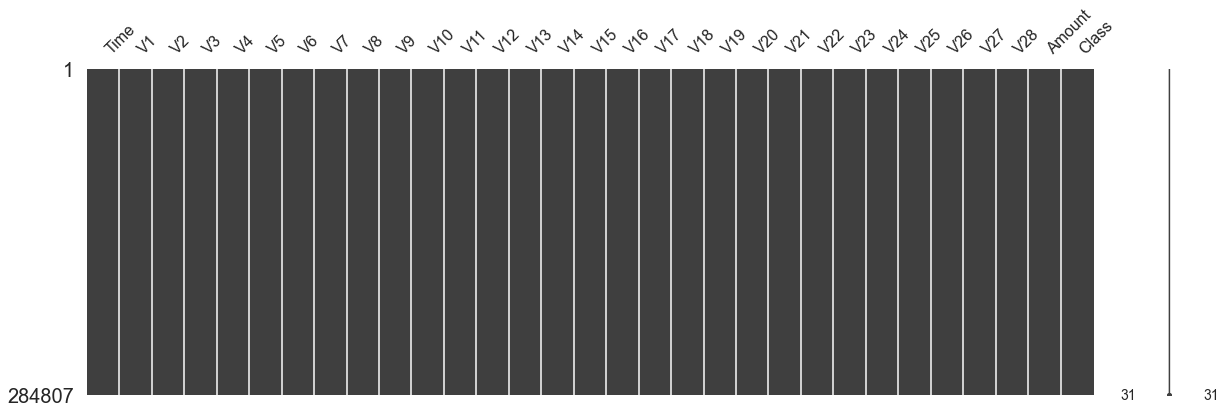

In [209]:
# visualising the missing data 
mno.matrix(df, figsize = (20, 6))

## as we can see above there are no nan values 

In [210]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [211]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [212]:
data = df.copy()

In [213]:
from termcolor import colored as cl # text customization

In [214]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [216]:
min (data.Amount) , max (data.Amount)

(0.0, 25691.16)

In [217]:
# reshaping the amount column
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
#sc = StandardScaler()
#amount = data['Amount'].values
#data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [218]:
# dropping the time column
data.drop(['Time'], axis=1, inplace=True)

In [219]:
data.shape

(284807, 30)

In [220]:
# removing duplicates
data[data.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284708,2.018105,0.073226,-1.615154,0.351058,0.333905,-0.676284,0.050474,-0.071028,0.302728,-0.193920,...,-0.306646,-0.841768,0.356773,0.655112,-0.331463,0.144352,-0.069820,-0.039845,1.98,0
284751,2.050734,-0.364010,-2.542843,-0.729357,2.388455,3.318015,-0.479138,0.791559,0.403374,0.093232,...,-0.293363,-0.834802,0.381740,0.698179,-0.264798,0.219275,-0.052131,-0.066940,0.89,0
284775,1.955547,-0.724606,-1.706511,-0.611145,1.710907,3.914215,-1.248690,1.054133,1.314064,-0.150553,...,0.193605,0.690196,0.155951,0.726775,-0.061219,-0.192666,0.060347,-0.042323,12.99,0
284785,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,-0.386953,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0


In [221]:
# as we can see aobve there are 1081 duplicated rows
# we will roemove the duplicates now to cleanup the data by using "drop_duplicates"
data.drop_duplicates(inplace=True)

In [222]:
data.shape

(275663, 30)

In [223]:
data.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


### outliers detection

In [224]:
#from scipy import stats
#clean_data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [225]:
#clean_data = clean_data.round(2)

In [226]:
#clean_data.shape

In [227]:
# we can not performe outlier removal part becuase the dataset is very imbalanced and if we try to remove the ouliers than we will only left with 0 in class column that is no fraud

In [228]:
f = data

In [229]:
plt.rc('figure', figsize=(20, 20))

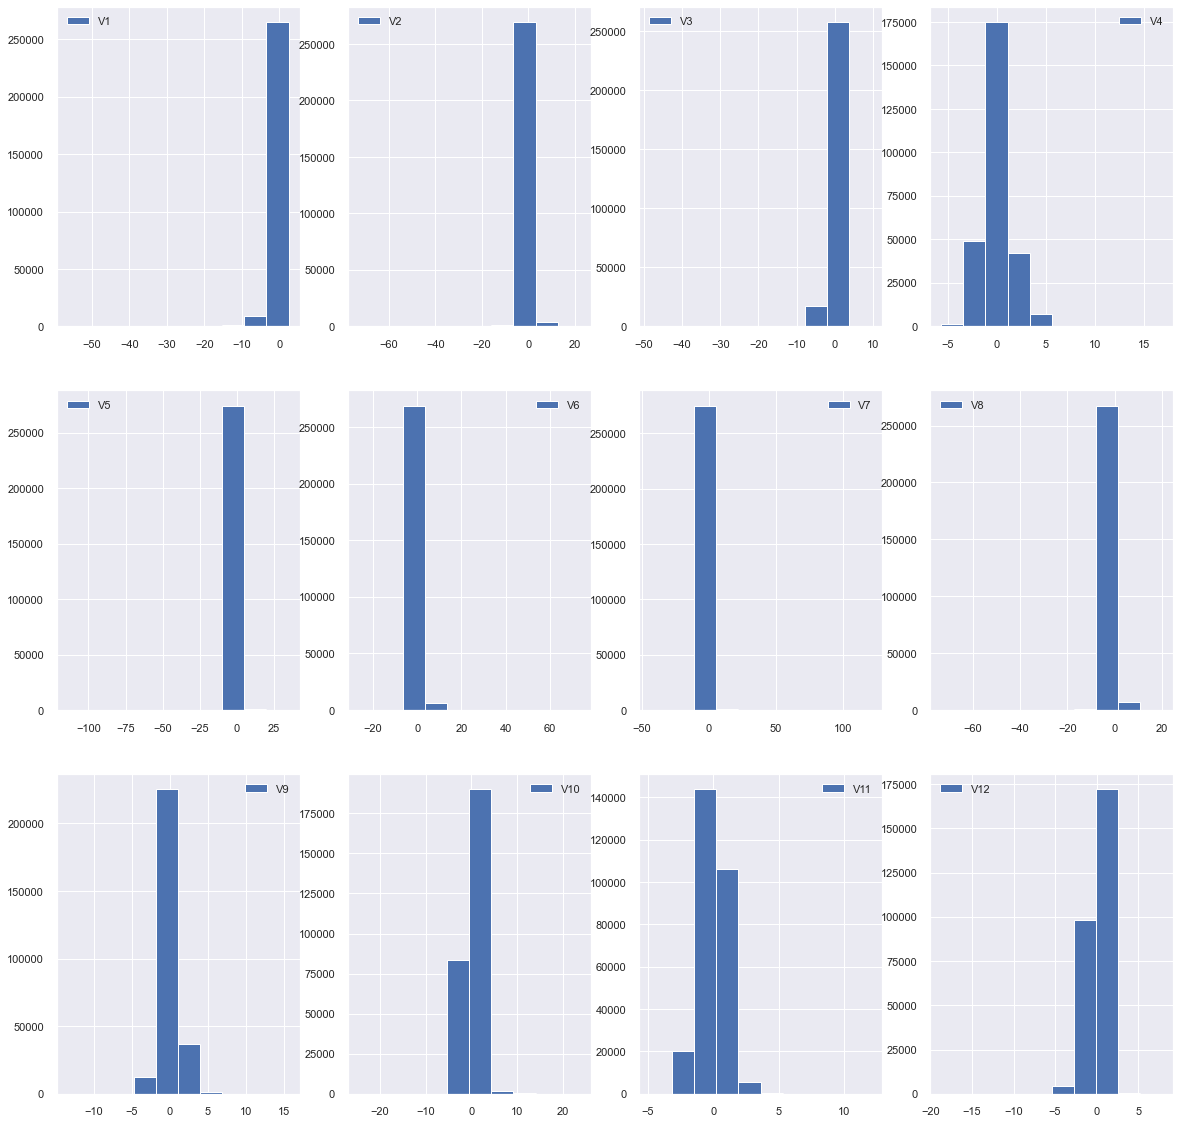

In [230]:
# VISUALIZING THE DATA BY HISTOGRAM
fig,ax = plt.subplots(3,4)
ax[0,0].hist(f['V1'])
ax[0,0].legend(['V1'])
ax[0,1].hist(f['V2'])
ax[0,1].legend(['V2'])
ax[0,2].hist(f['V3'])
ax[0,2].legend(['V3'])
ax[0,3].hist(f['V4'])
ax[0,3].legend(['V4'])
ax[1,0].hist(f['V5'])
ax[1,0].legend(['V5'])
ax[1,1].hist(f['V6'])
ax[1,1].legend(['V6'])
ax[1,2].hist(f['V7'])
ax[1,2].legend(['V7'])
ax[1,3].hist(f['V8'])
ax[1,3].legend(['V8'])
ax[2,0].hist(f['V9'])
ax[2,0].legend(['V9'])
ax[2,1].hist(f['V10'])
ax[2,1].legend(['V10'])
ax[2,2].hist(f['V11'])
ax[2,2].legend(['V11'])
ax[2,3].hist(f['V12'])
ax[2,3].legend(['V12'])
#plt.figure(figsize=(150,300))
# To load the display window
plt.show()

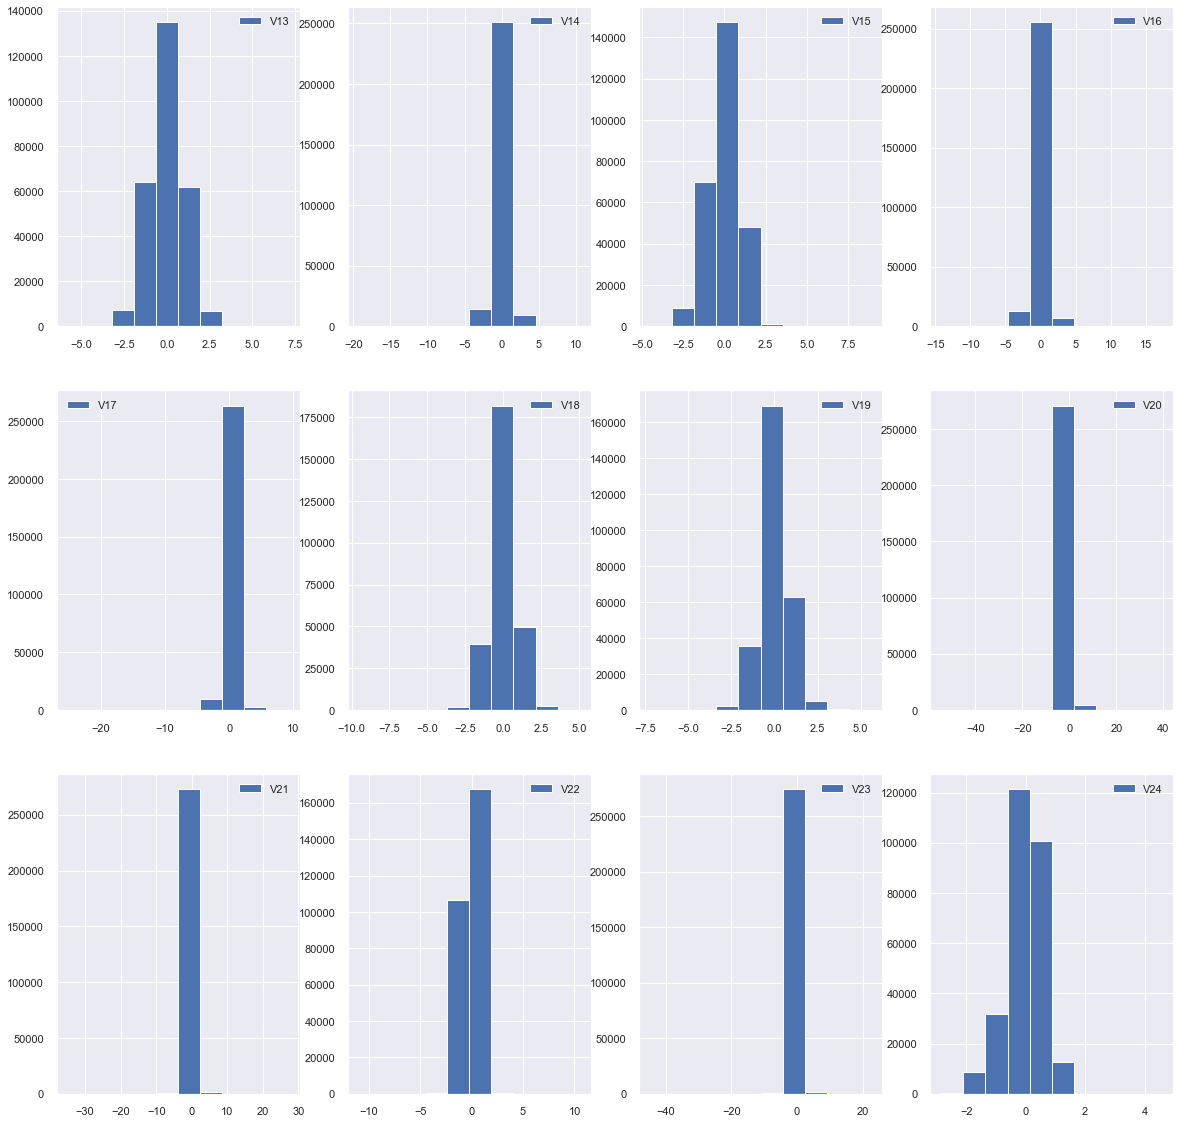

In [231]:
# VISUALIZING THE DATA BY HISTOGRAM
fig,ax = plt.subplots(3,4)
ax[0,0].hist(f['V13'])
ax[0,0].legend(['V13'])
ax[0,1].hist(f['V14'])
ax[0,1].legend(['V14'])
ax[0,2].hist(f['V15'])
ax[0,2].legend(['V15'])
ax[0,3].hist(f['V16'])
ax[0,3].legend(['V16'])
ax[1,0].hist(f['V17'])
ax[1,0].legend(['V17'])
ax[1,1].hist(f['V18'])
ax[1,1].legend(['V18'])
ax[1,2].hist(f['V19'])
ax[1,2].legend(['V19'])
ax[1,3].hist(f['V20'])
ax[1,3].legend(['V20'])
ax[2,0].hist(f['V21'])
ax[2,0].legend(['V21'])
ax[2,1].hist(f['V22'])
ax[2,1].legend(['V22'])
ax[2,2].hist(f['V23'])
ax[2,2].legend(['V23'])
ax[2,3].hist(f['V24'])
ax[2,3].legend(['V24'])
#plt.figure(figsize=(150,300))
# To load the display window
plt.show()

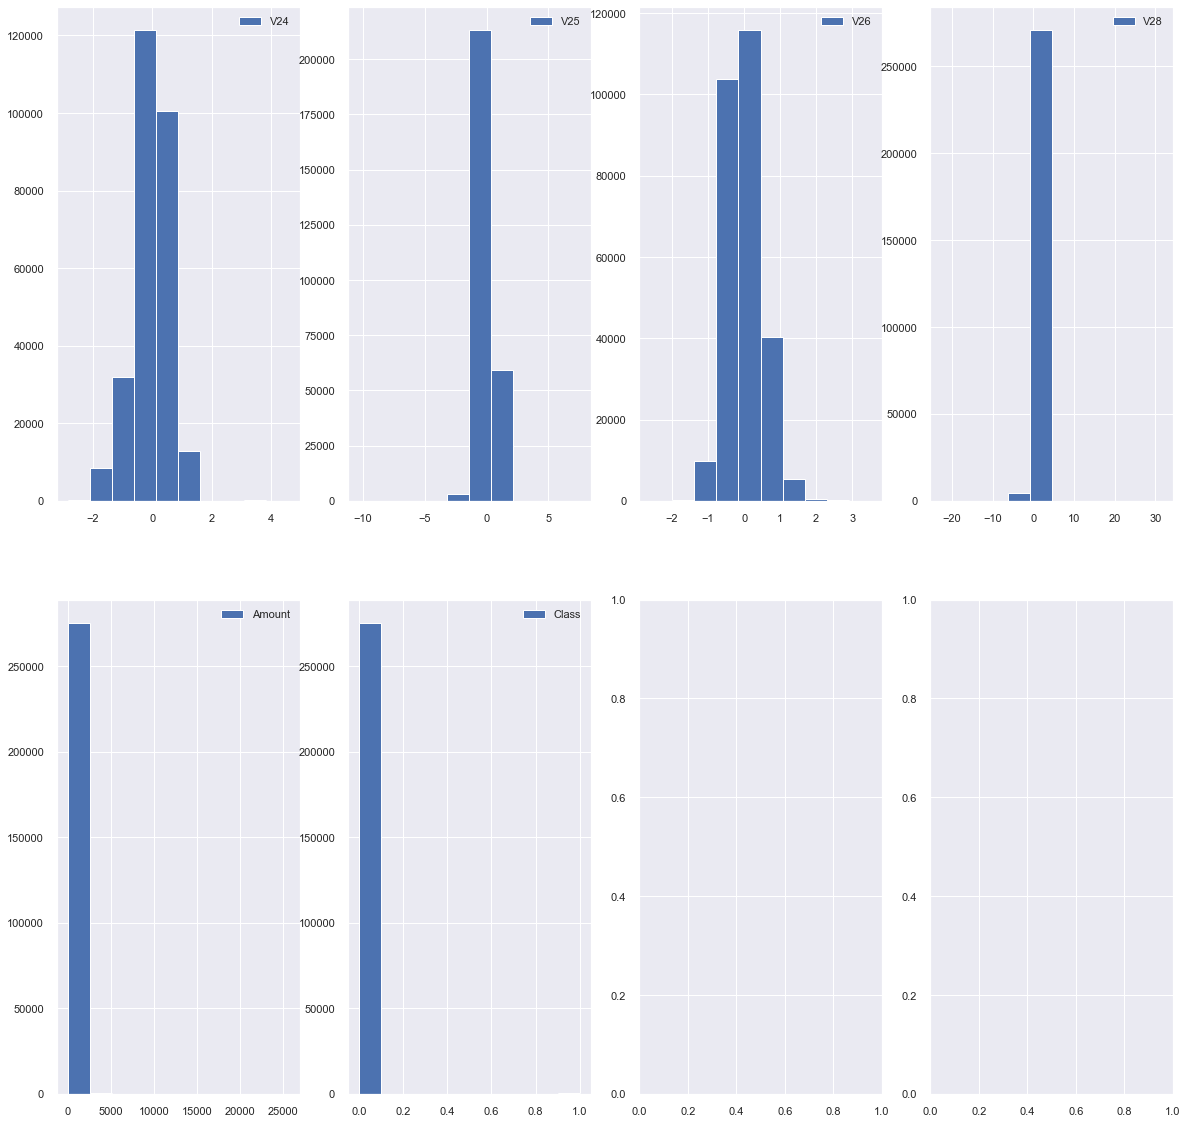

In [232]:
# VISUALIZING THE DATA BY HISTOGRAM
fig,ax = plt.subplots(2,4)
ax[0,0].hist(f['V24'])
ax[0,0].legend(['V24'])
ax[0,1].hist(f['V25'])
ax[0,1].legend(['V25'])
ax[0,2].hist(f['V26'])
ax[0,2].legend(['V26'])
ax[0,3].hist(f['V27'])
ax[0,3].legend(['V28'])

ax[1,0].hist(f['Amount'])
ax[1,0].legend(['Amount'])
ax[1,1].hist(f['Class'])
ax[1,1].legend(['Class'])

#plt.figure(figsize=(150,300))
# To load the display window
plt.show()

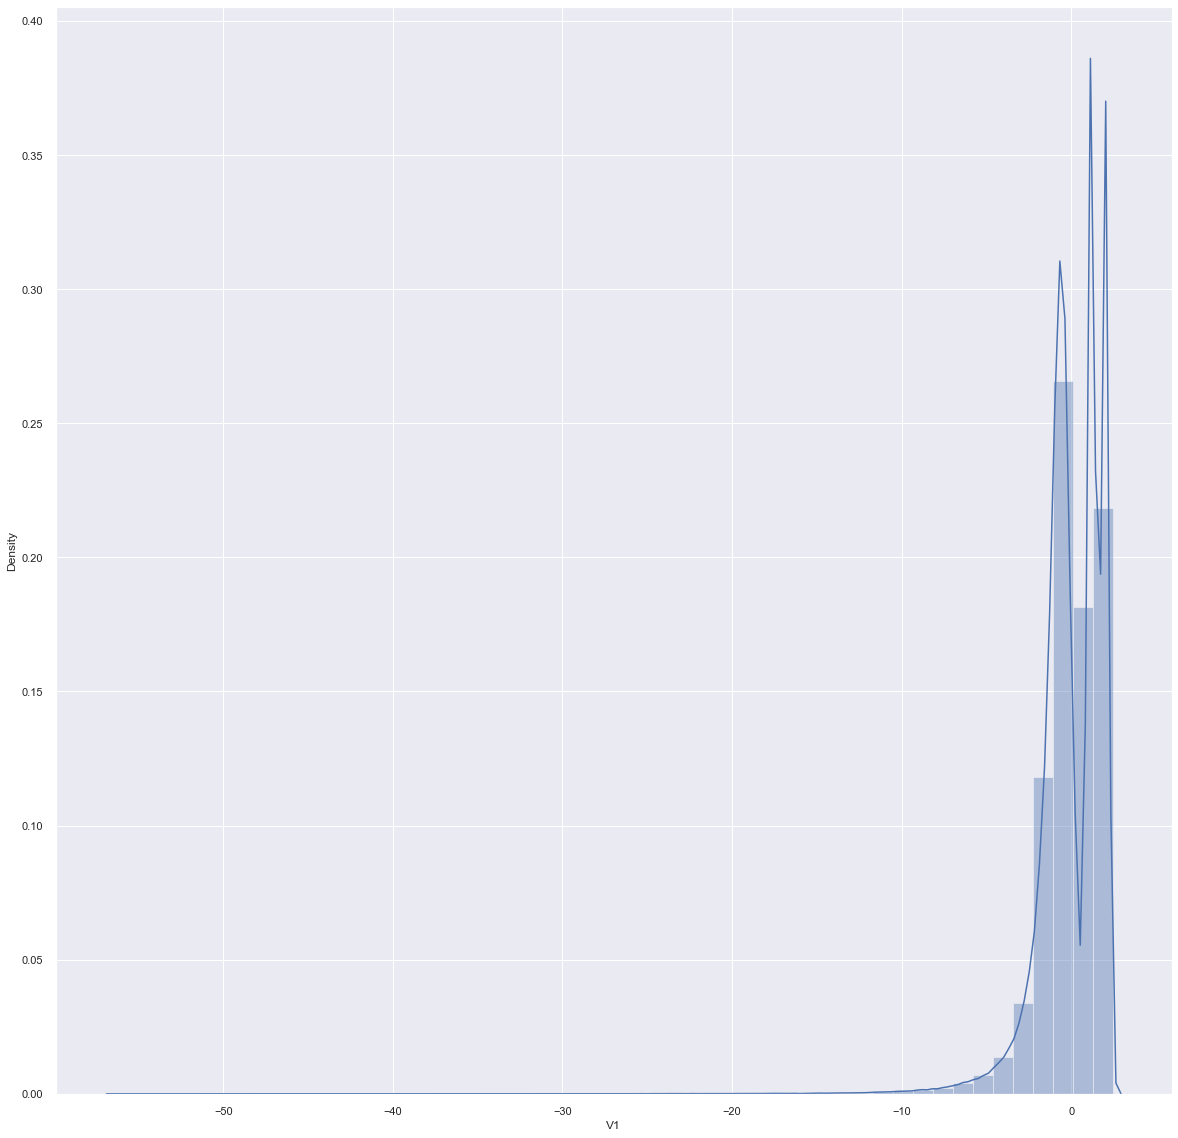

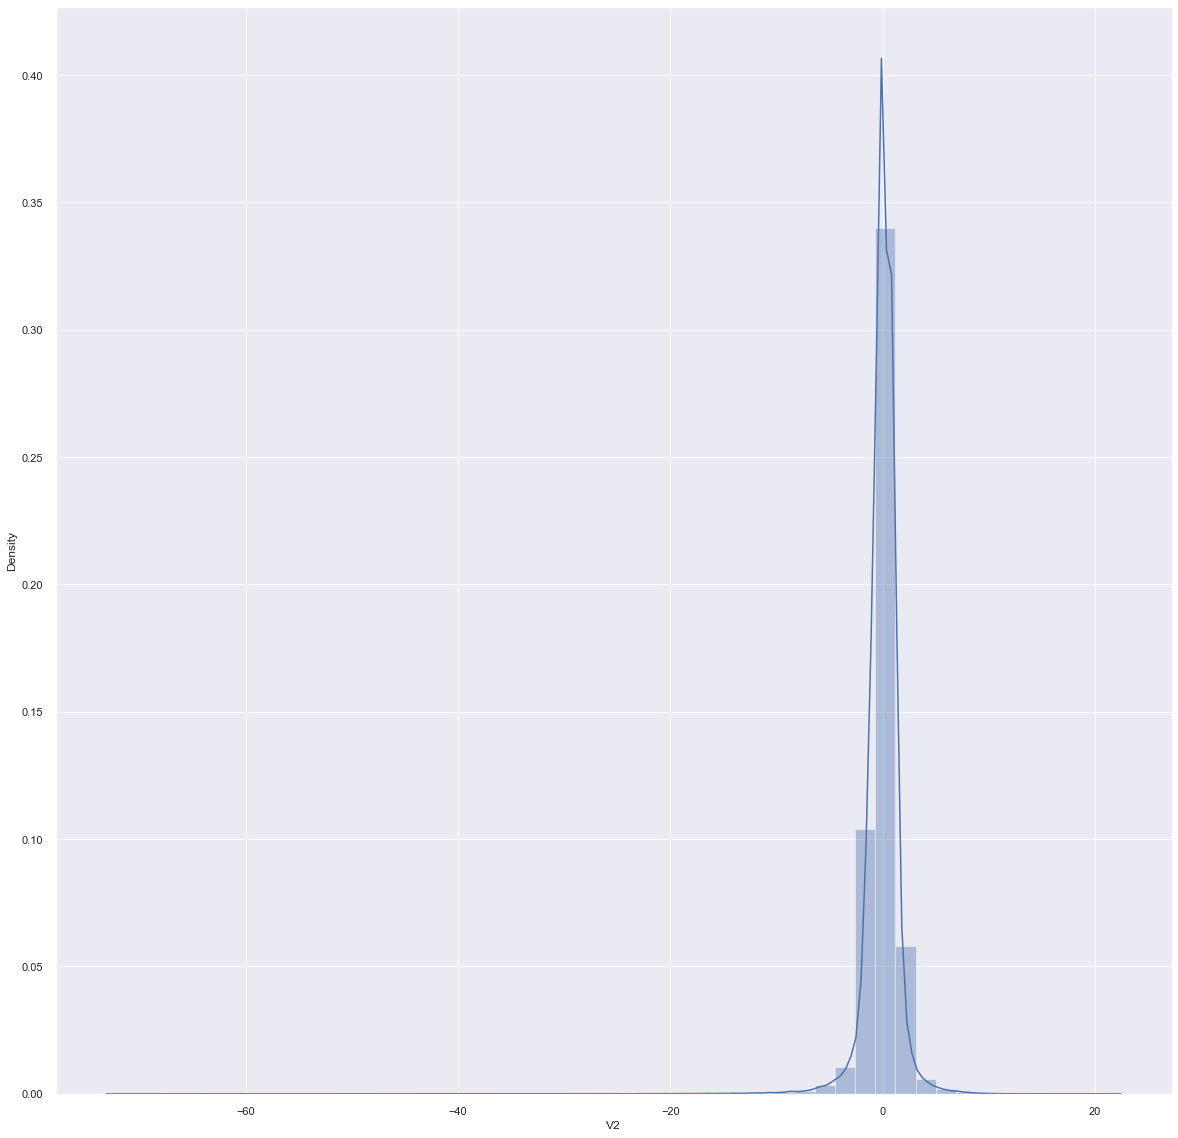

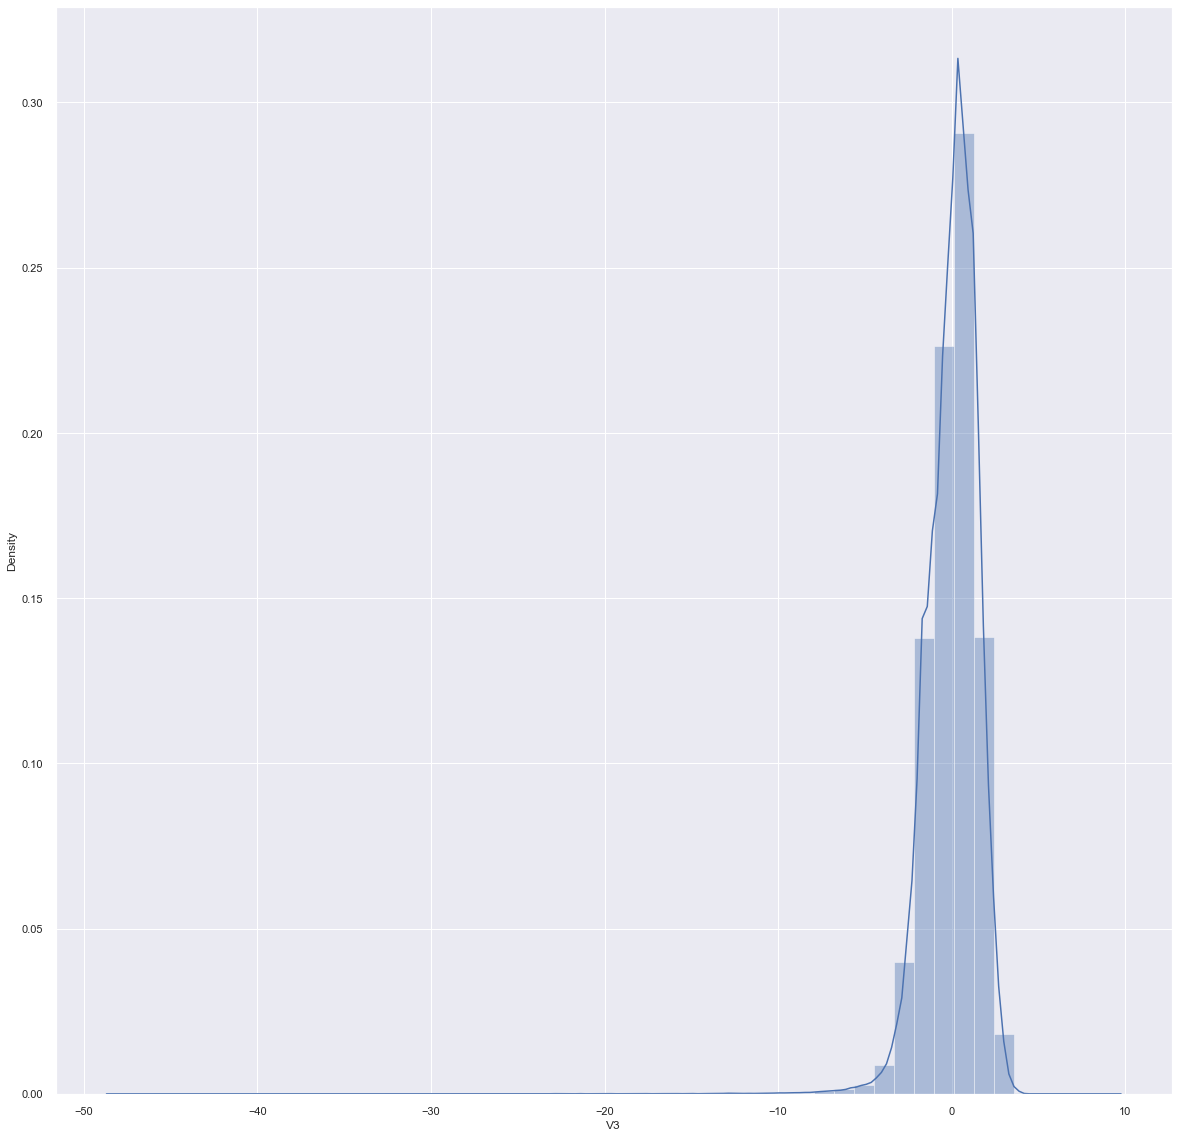

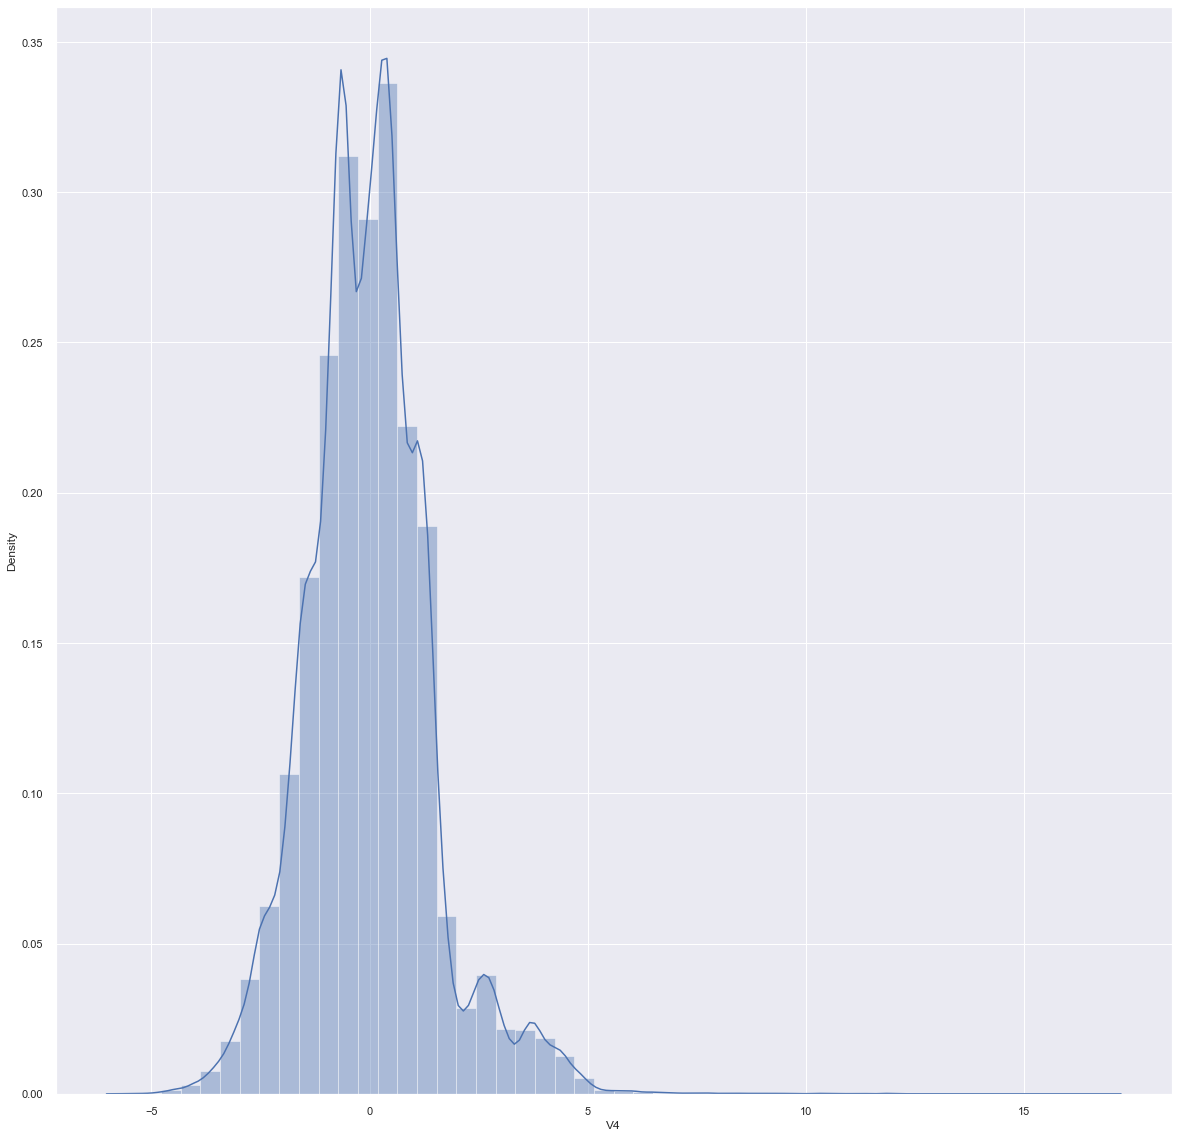

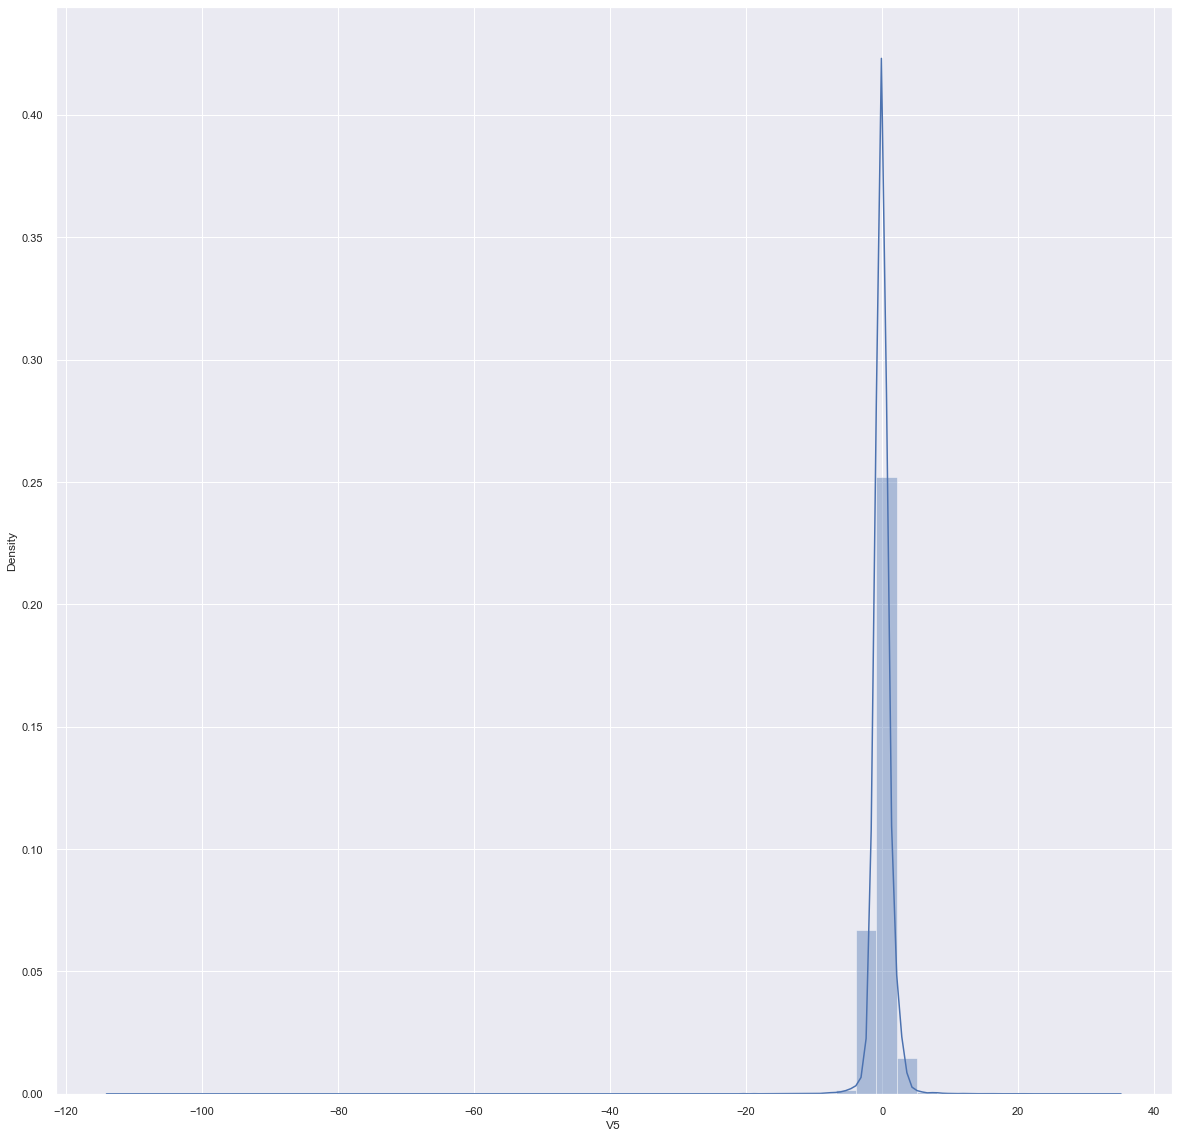

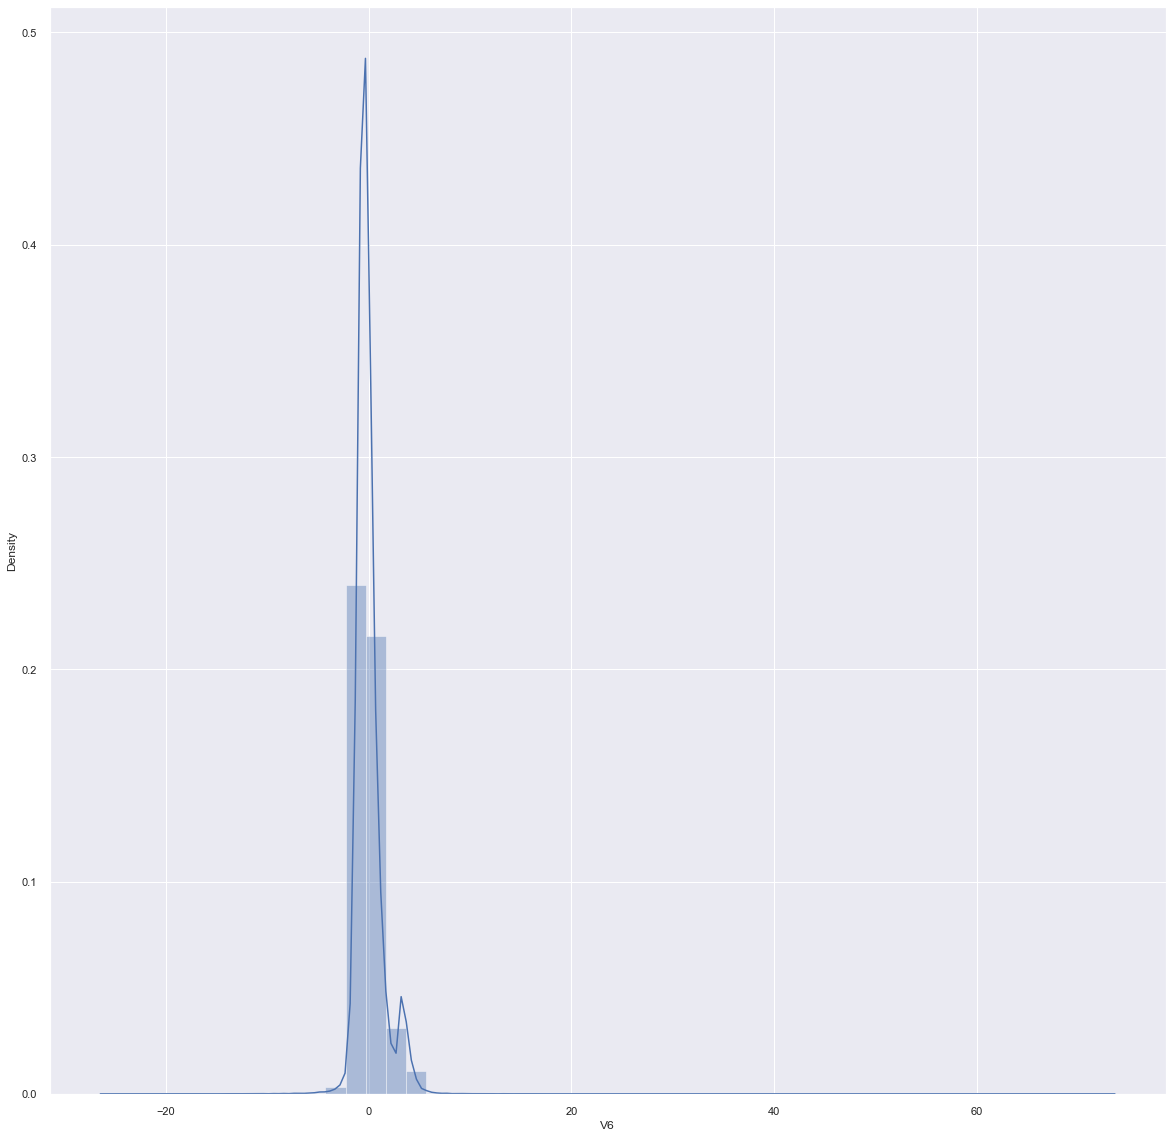

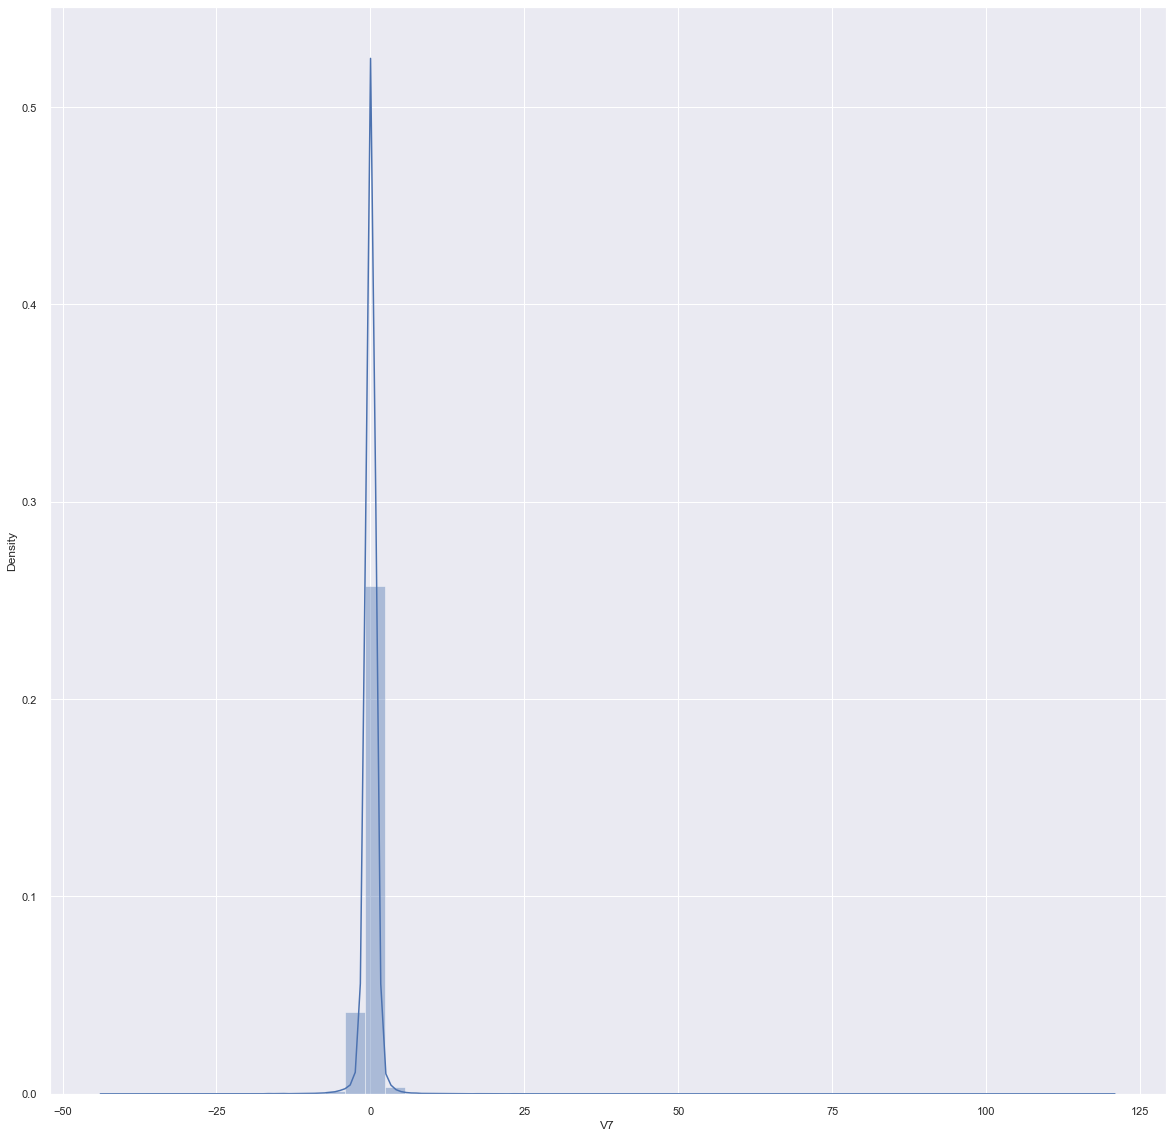

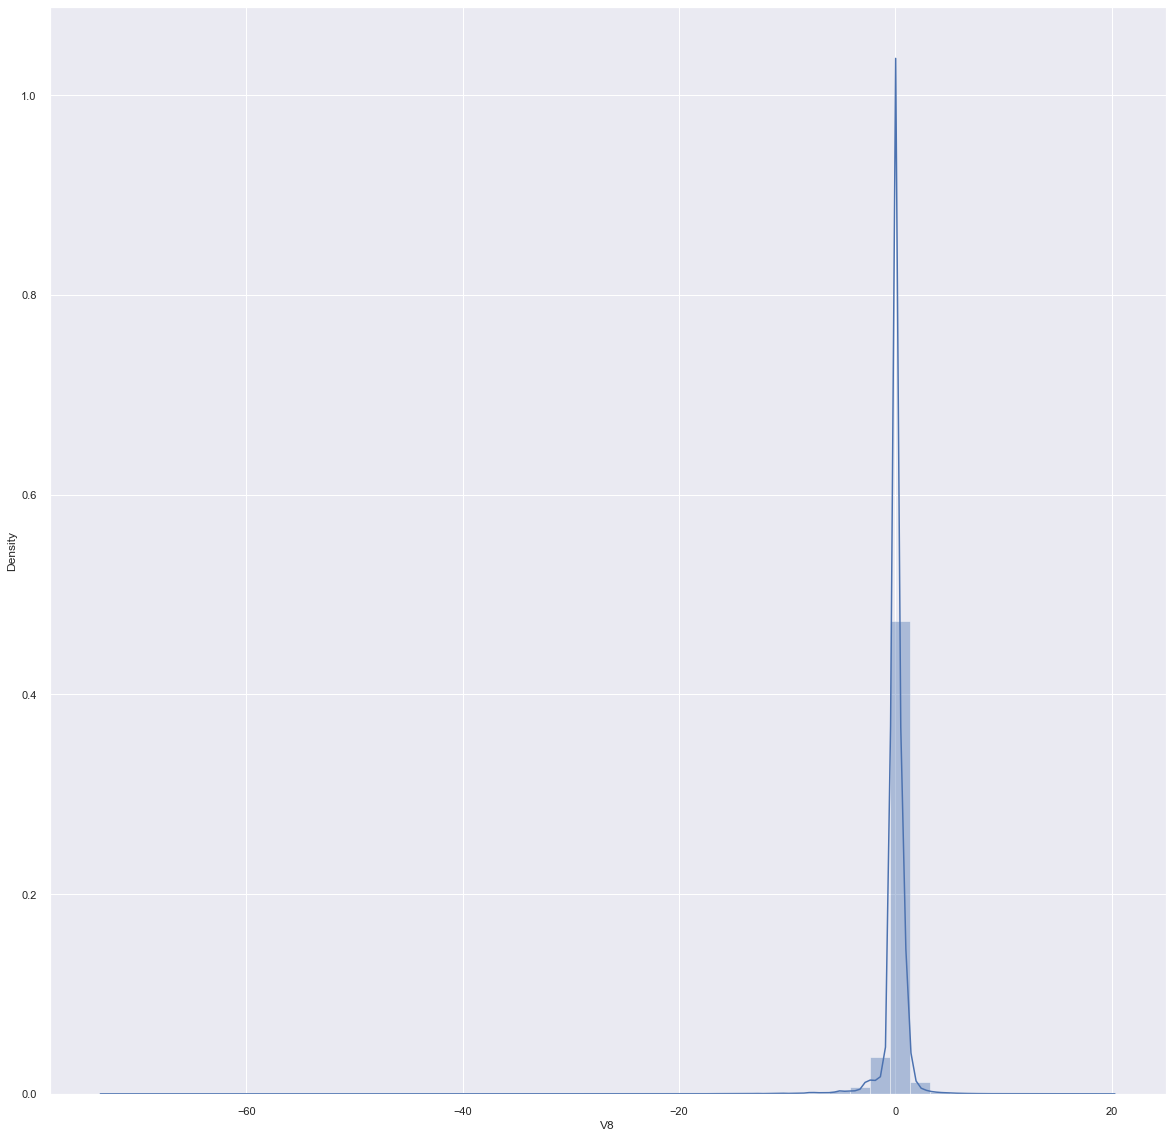

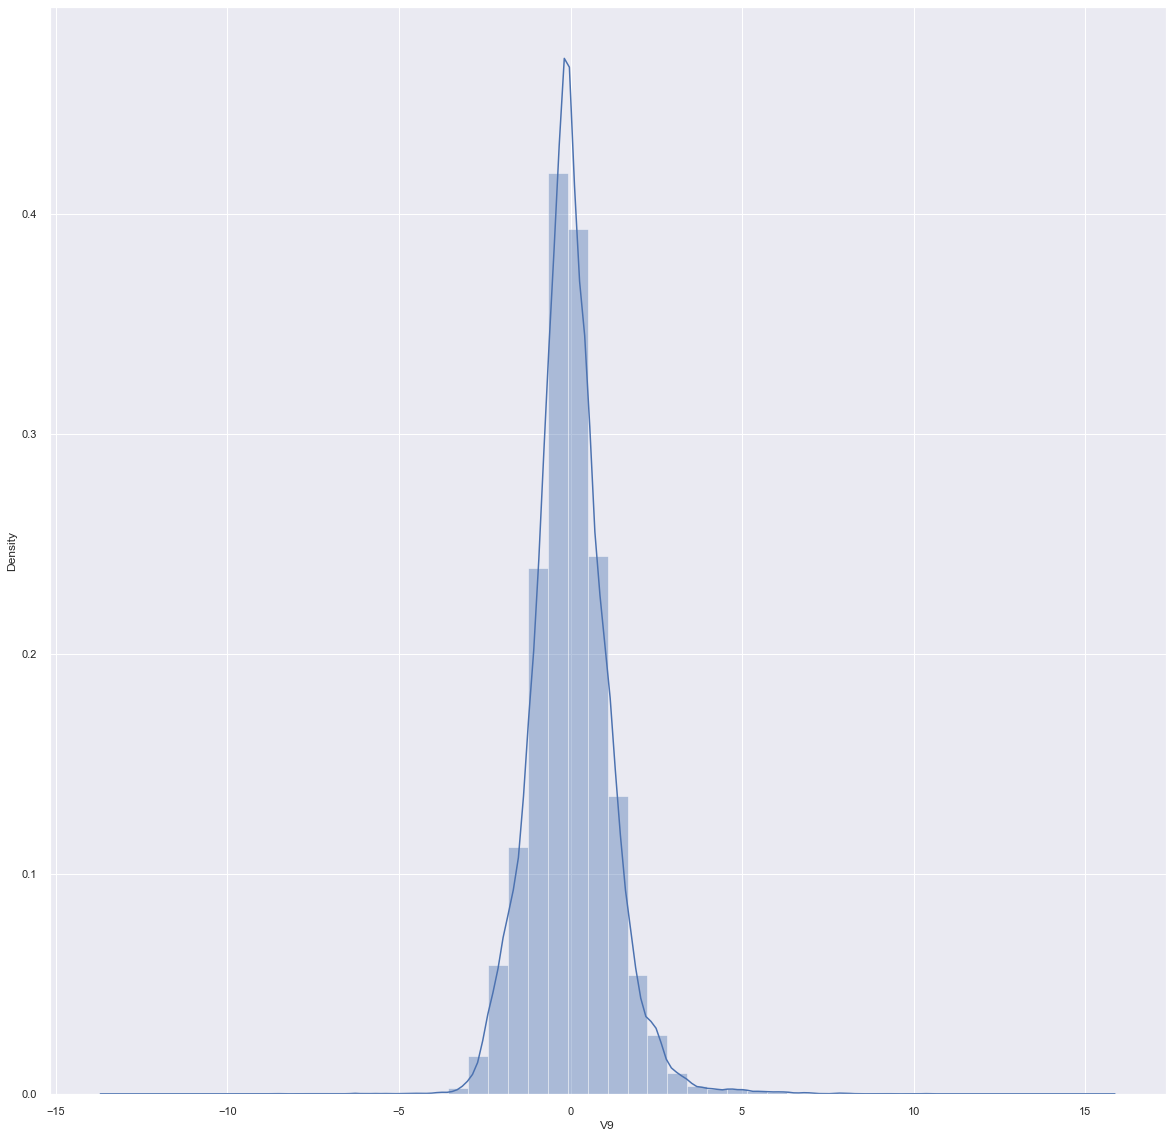

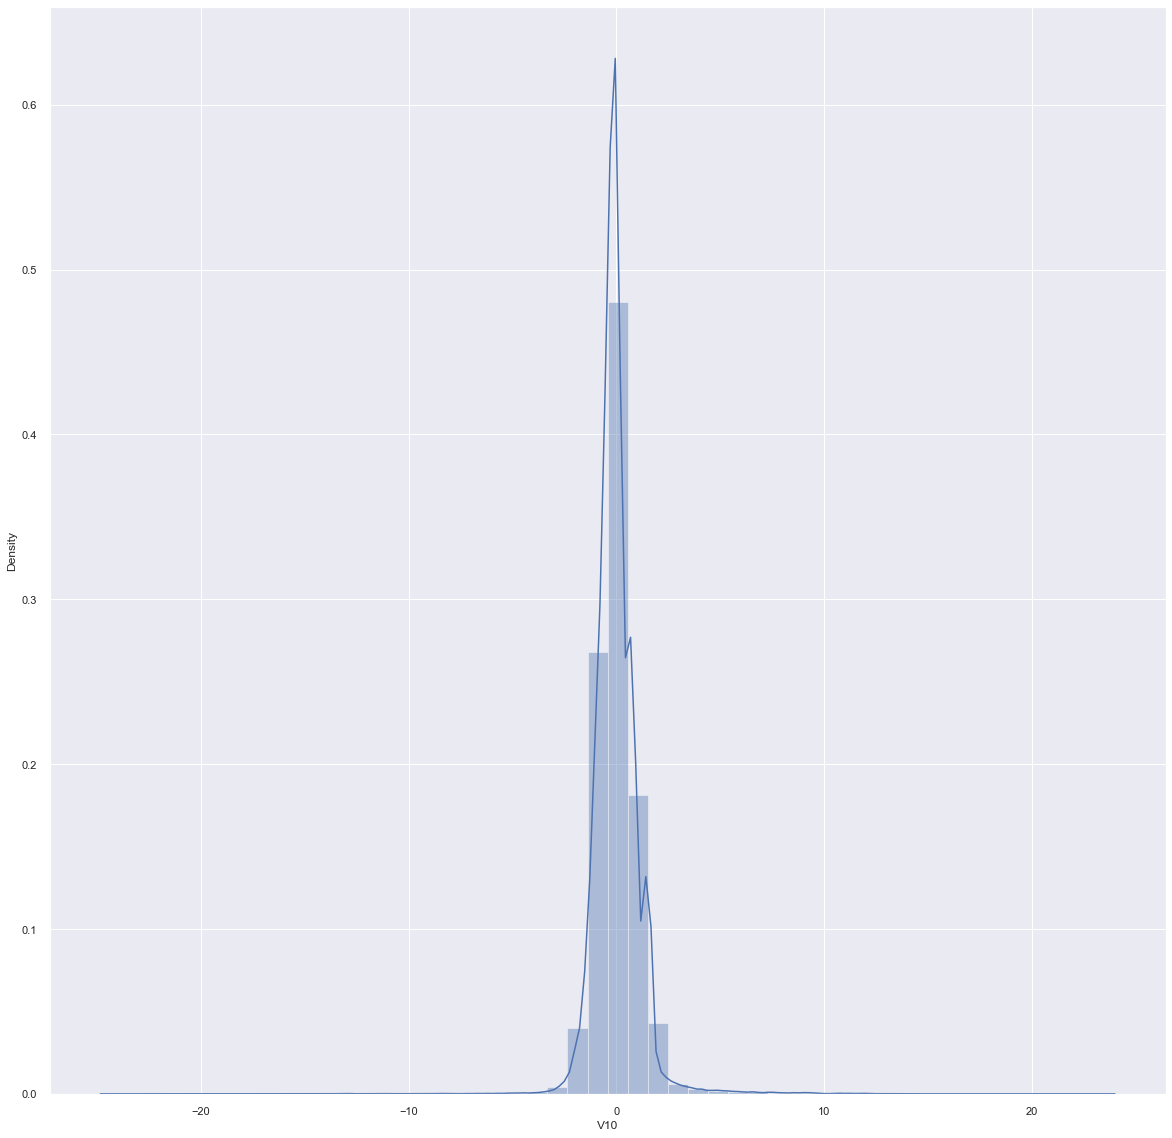

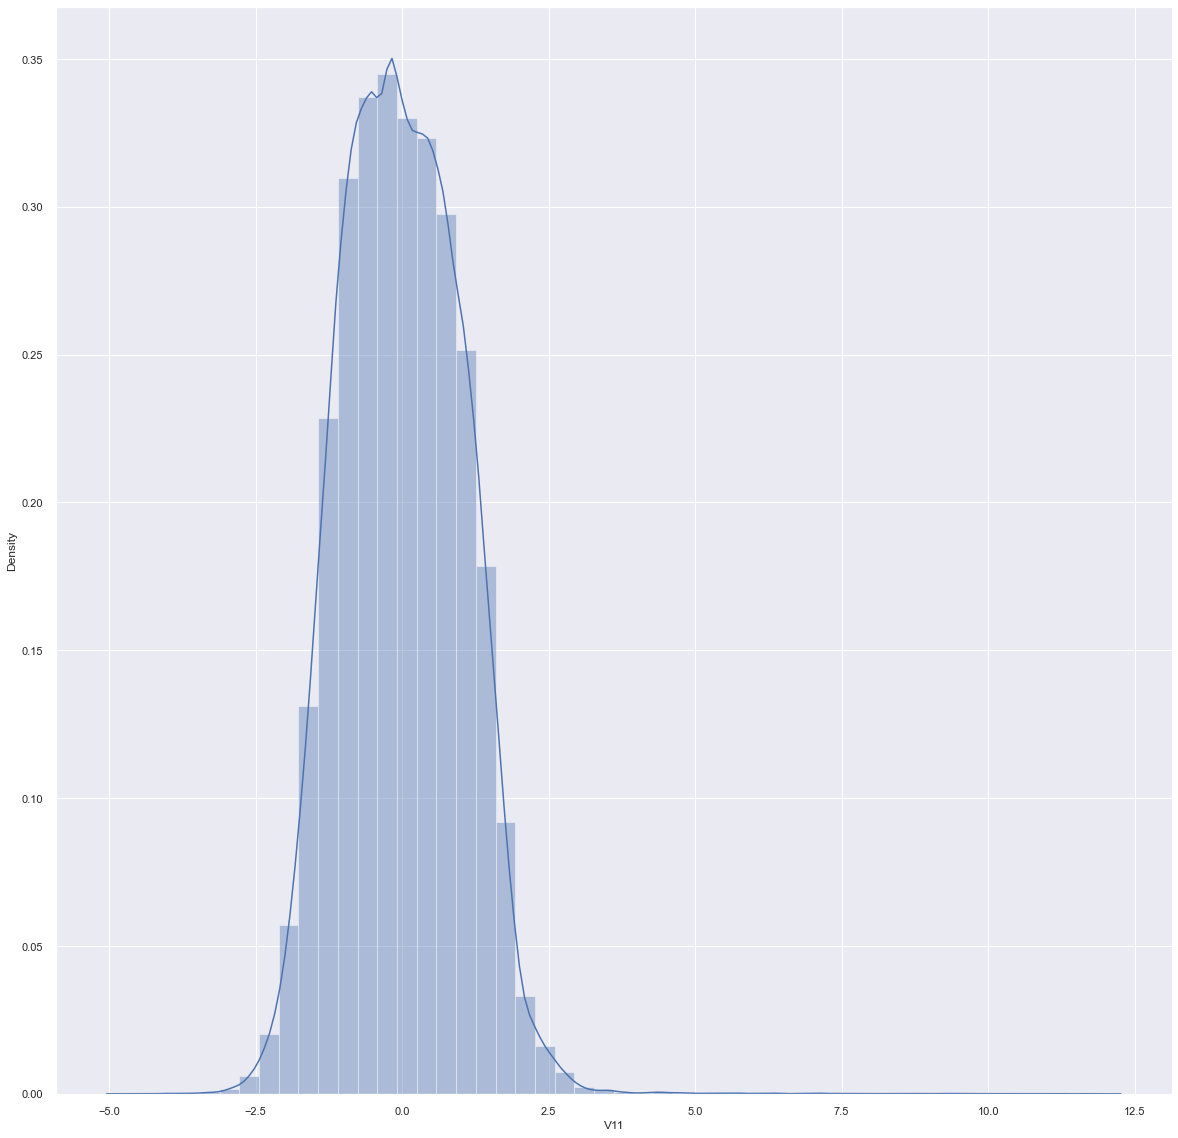

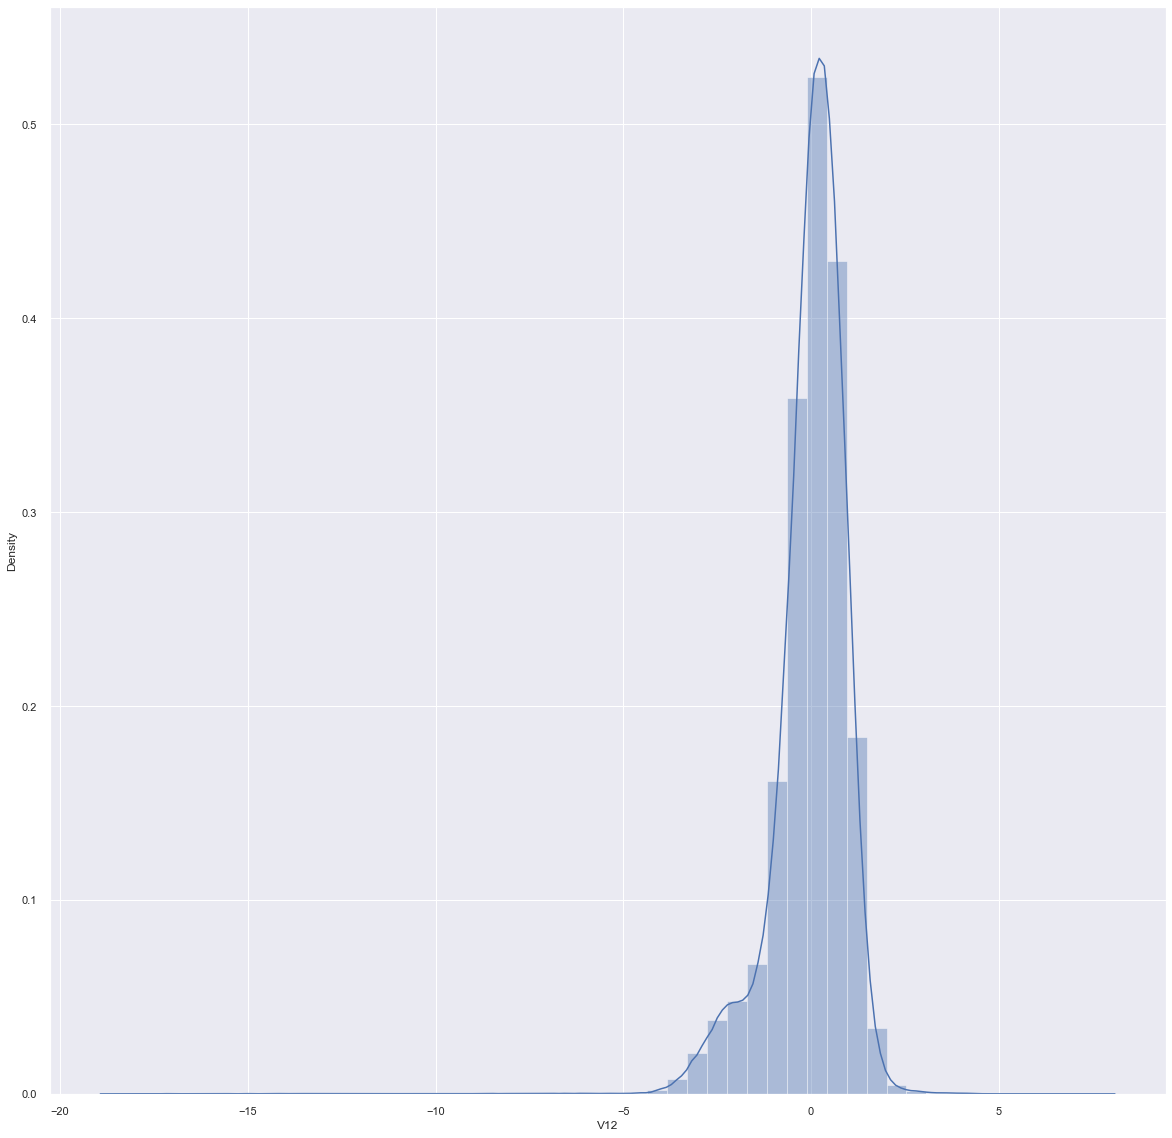

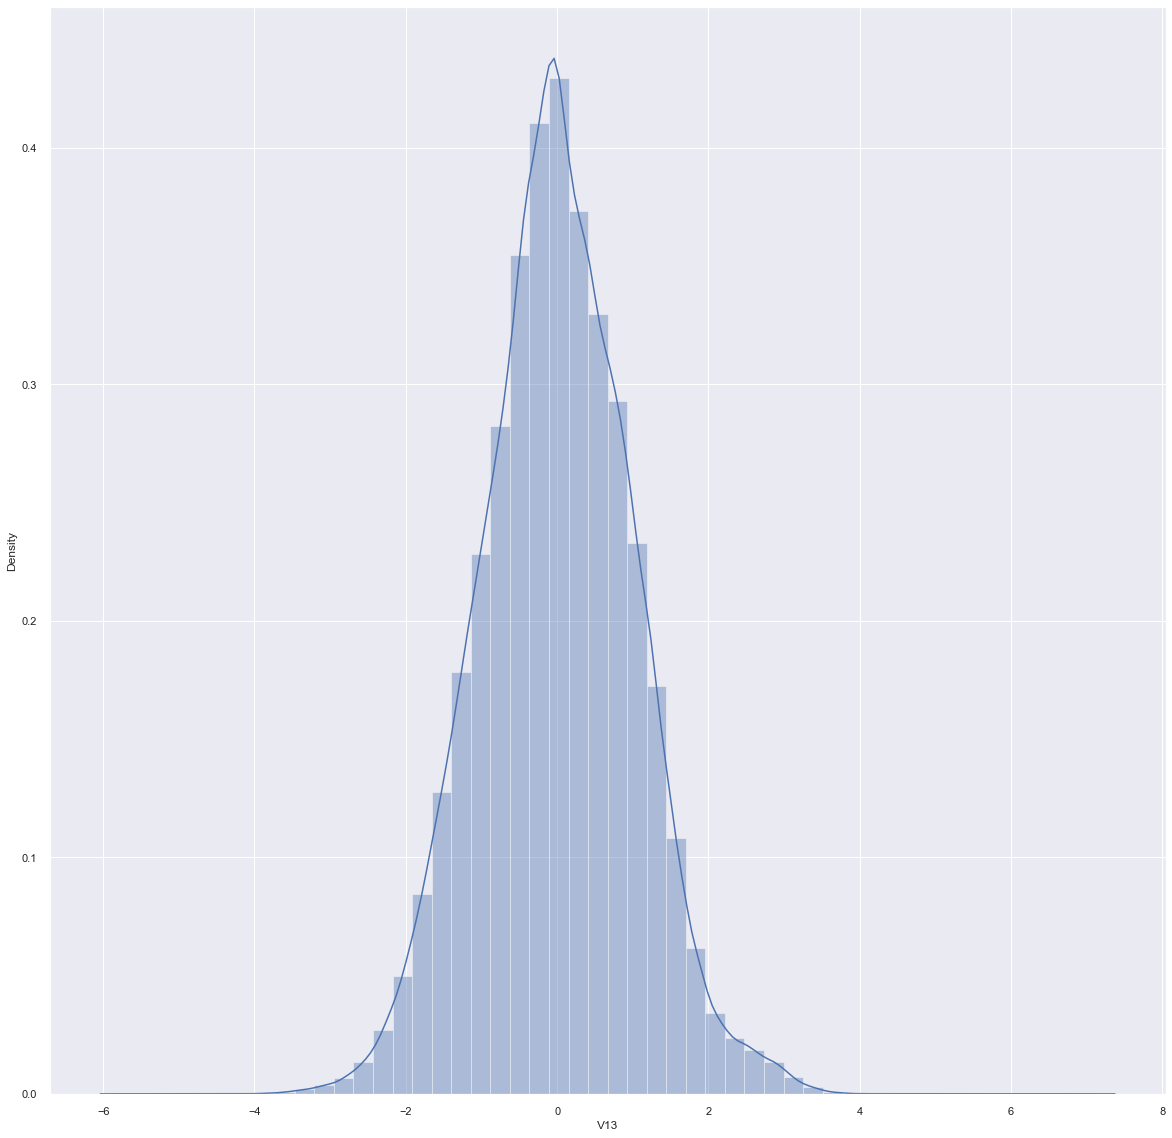

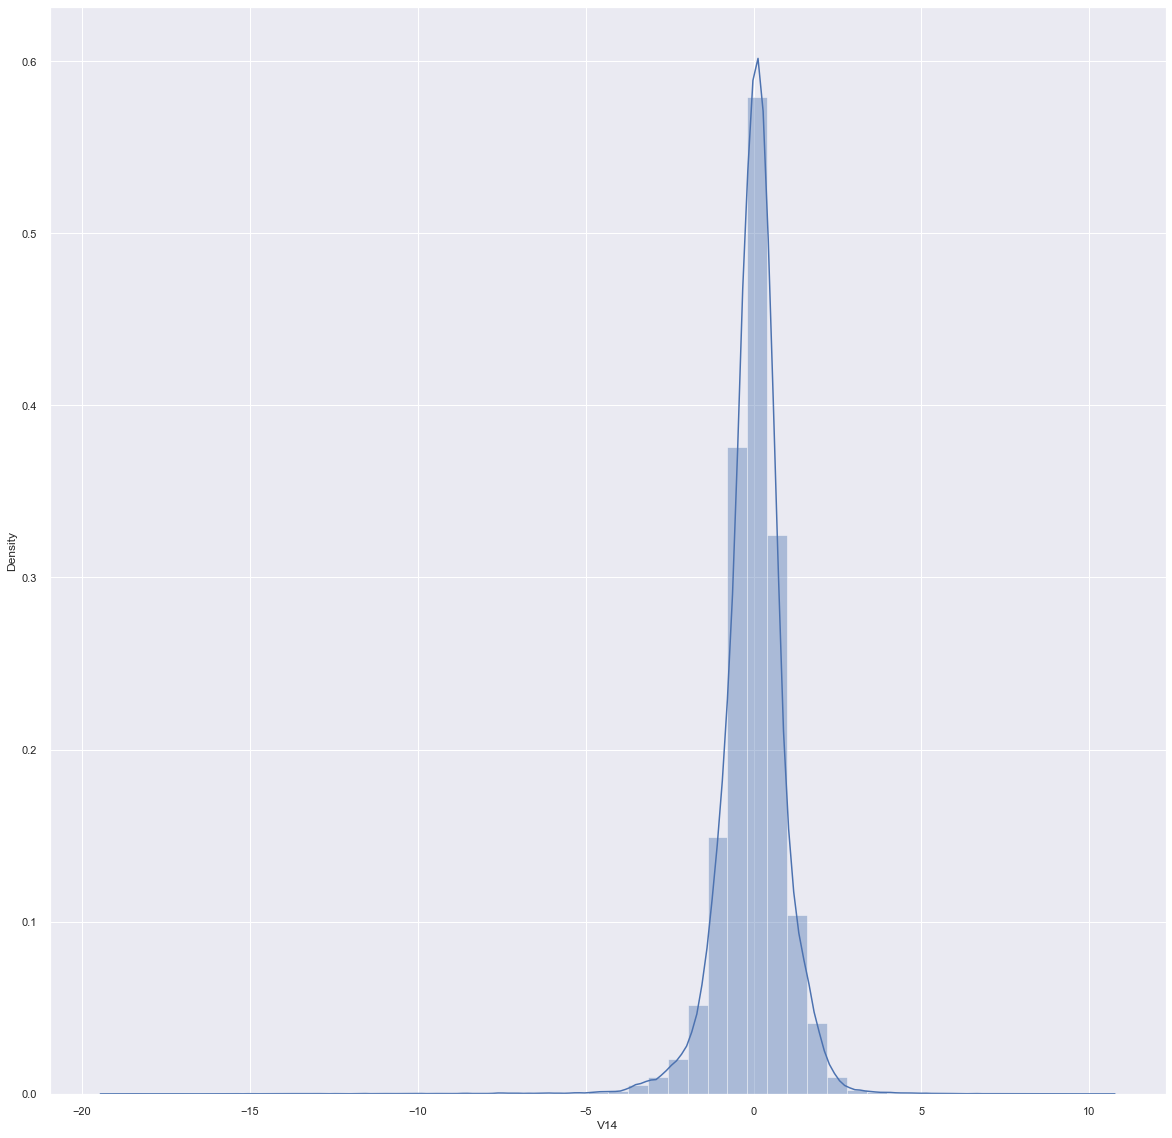

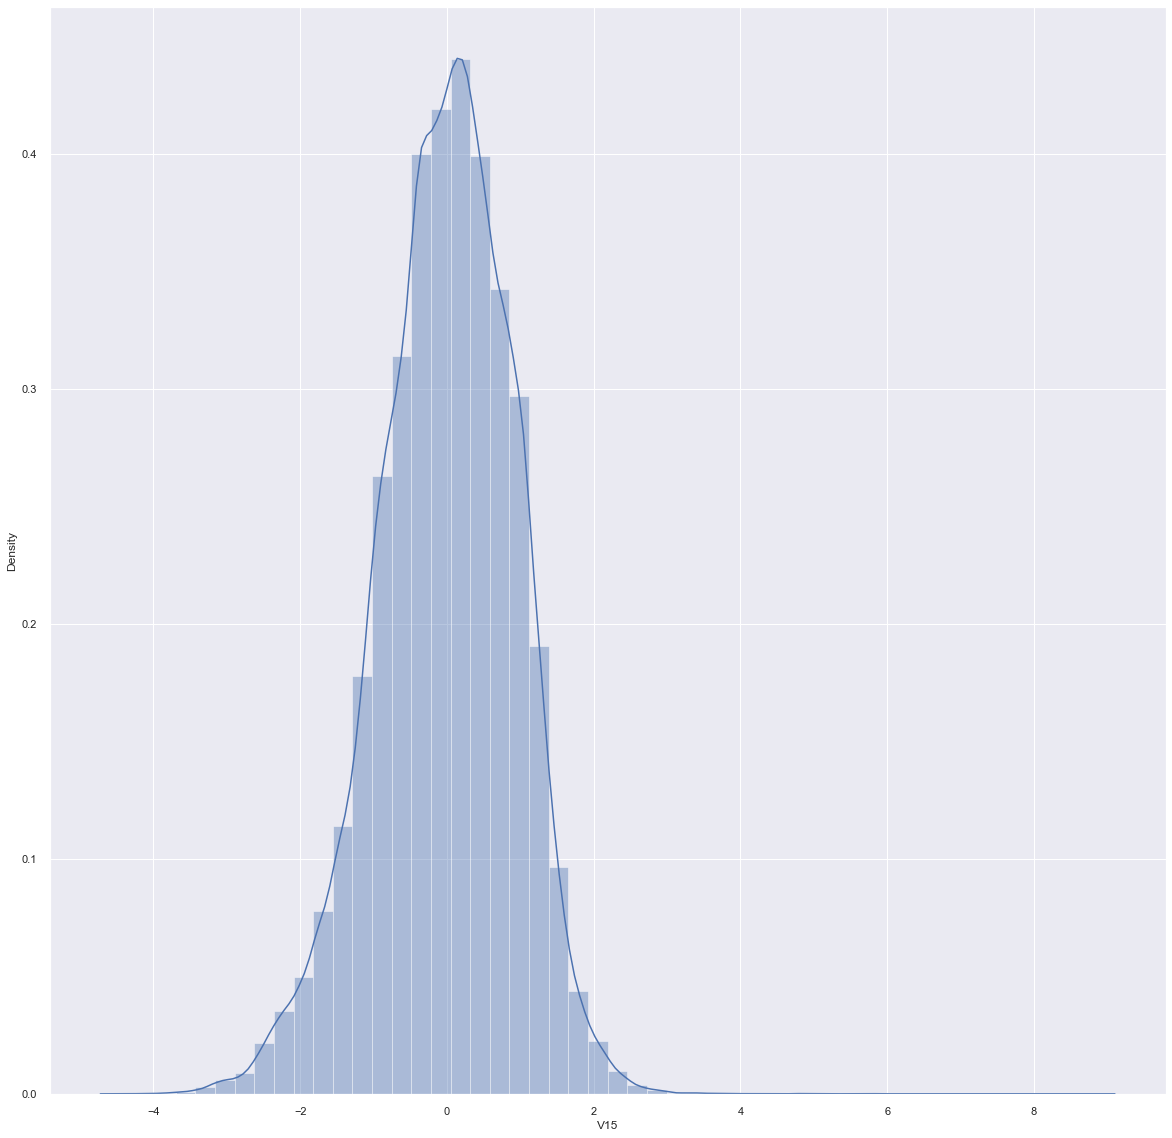

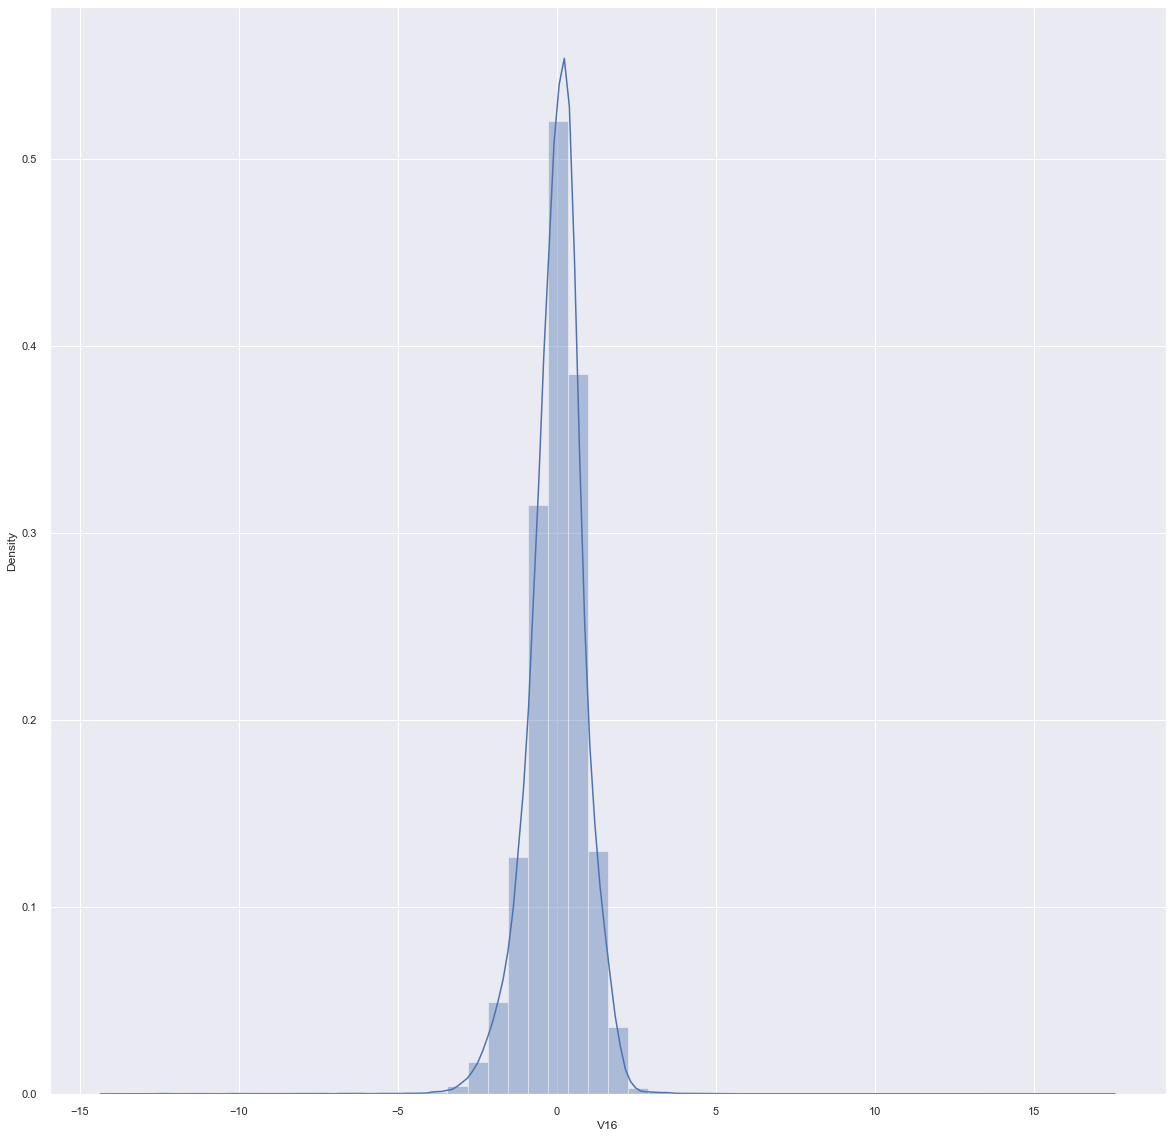

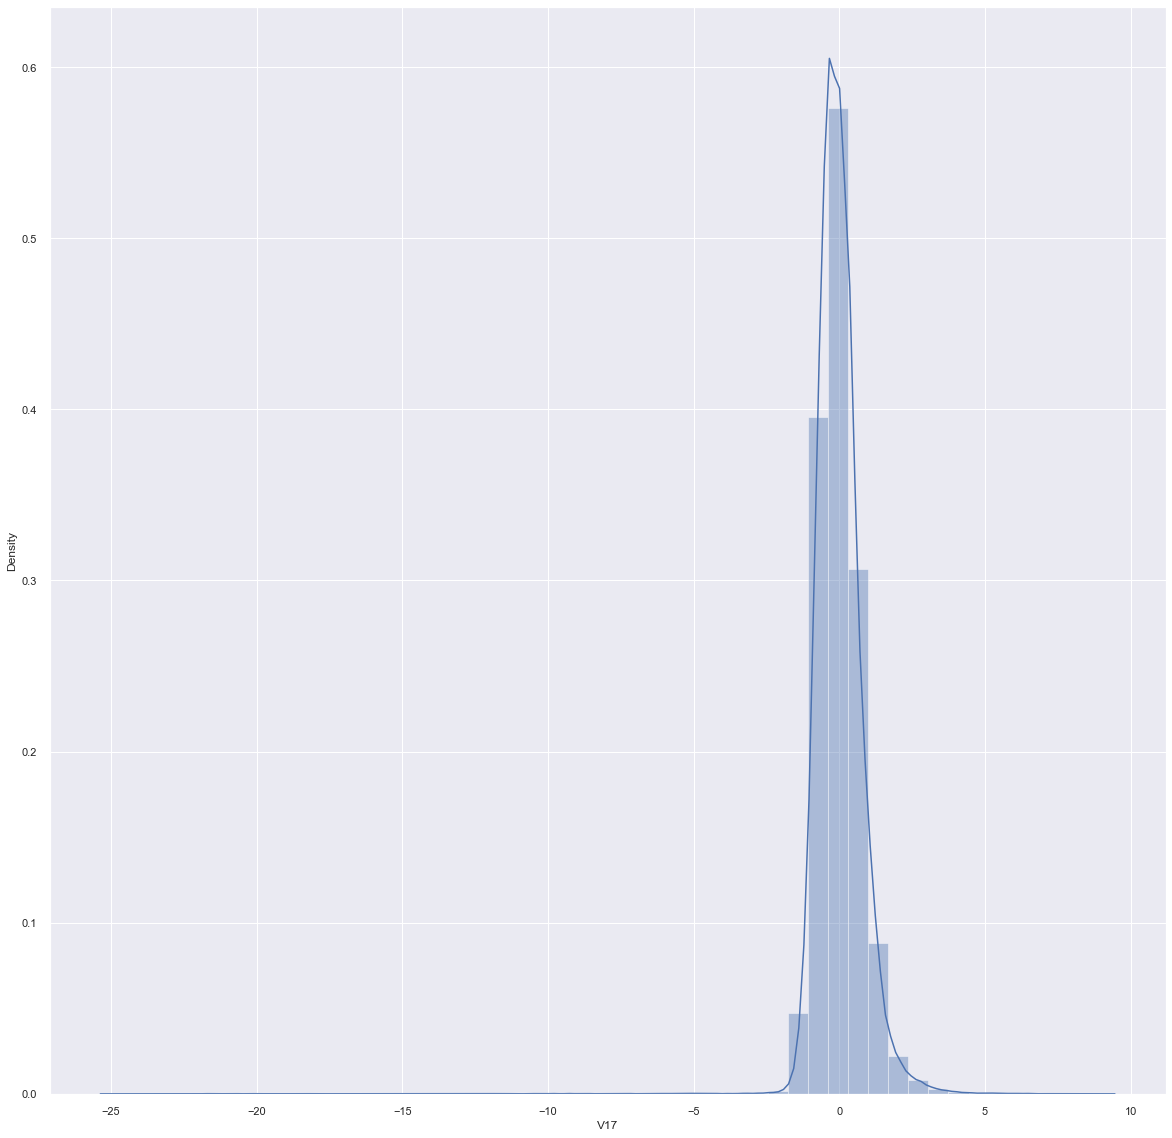

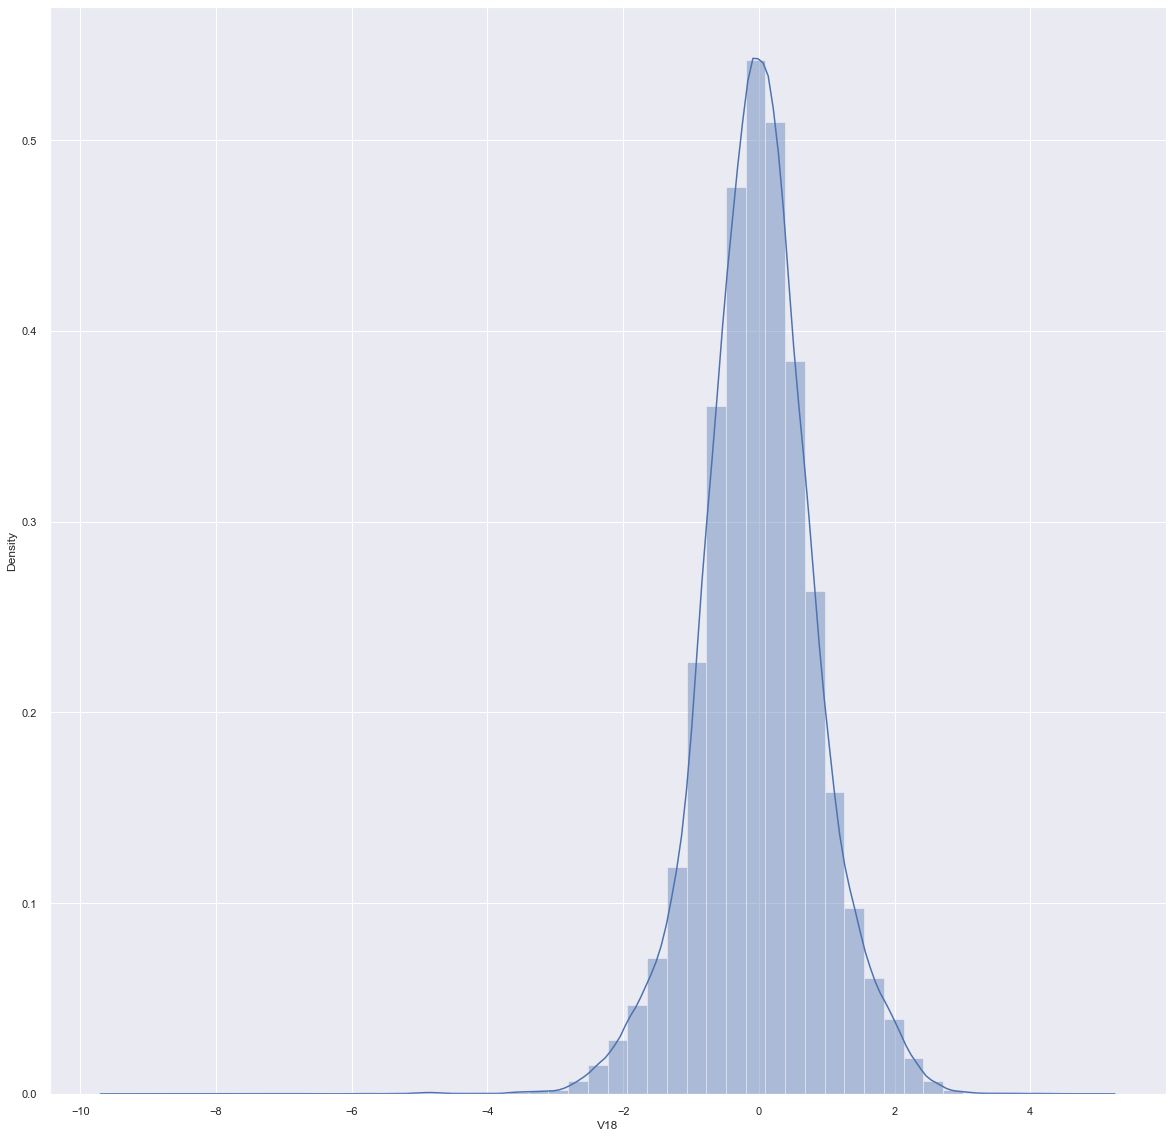

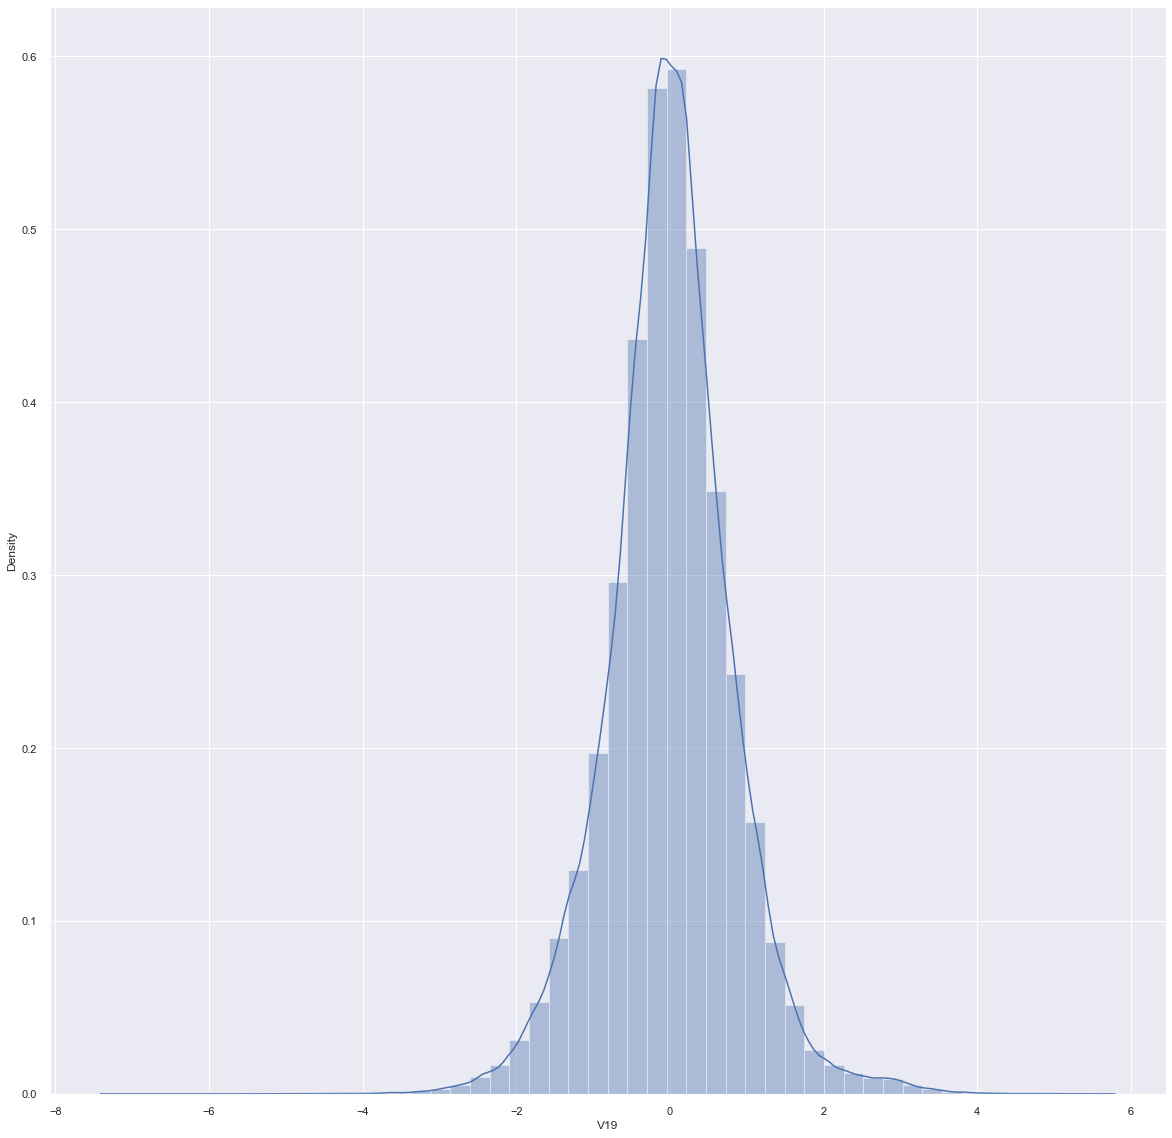

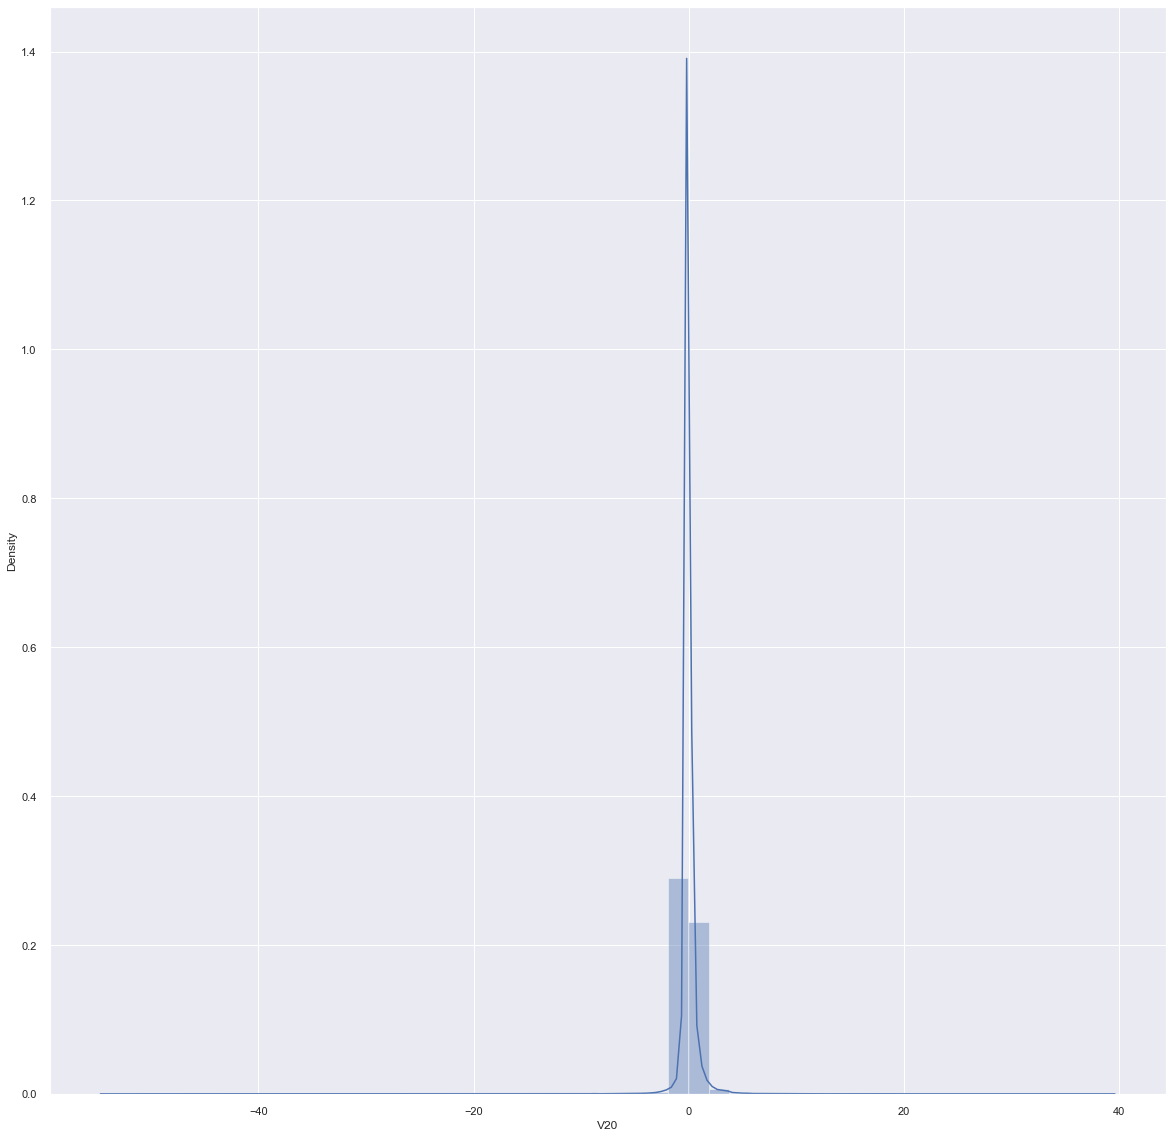

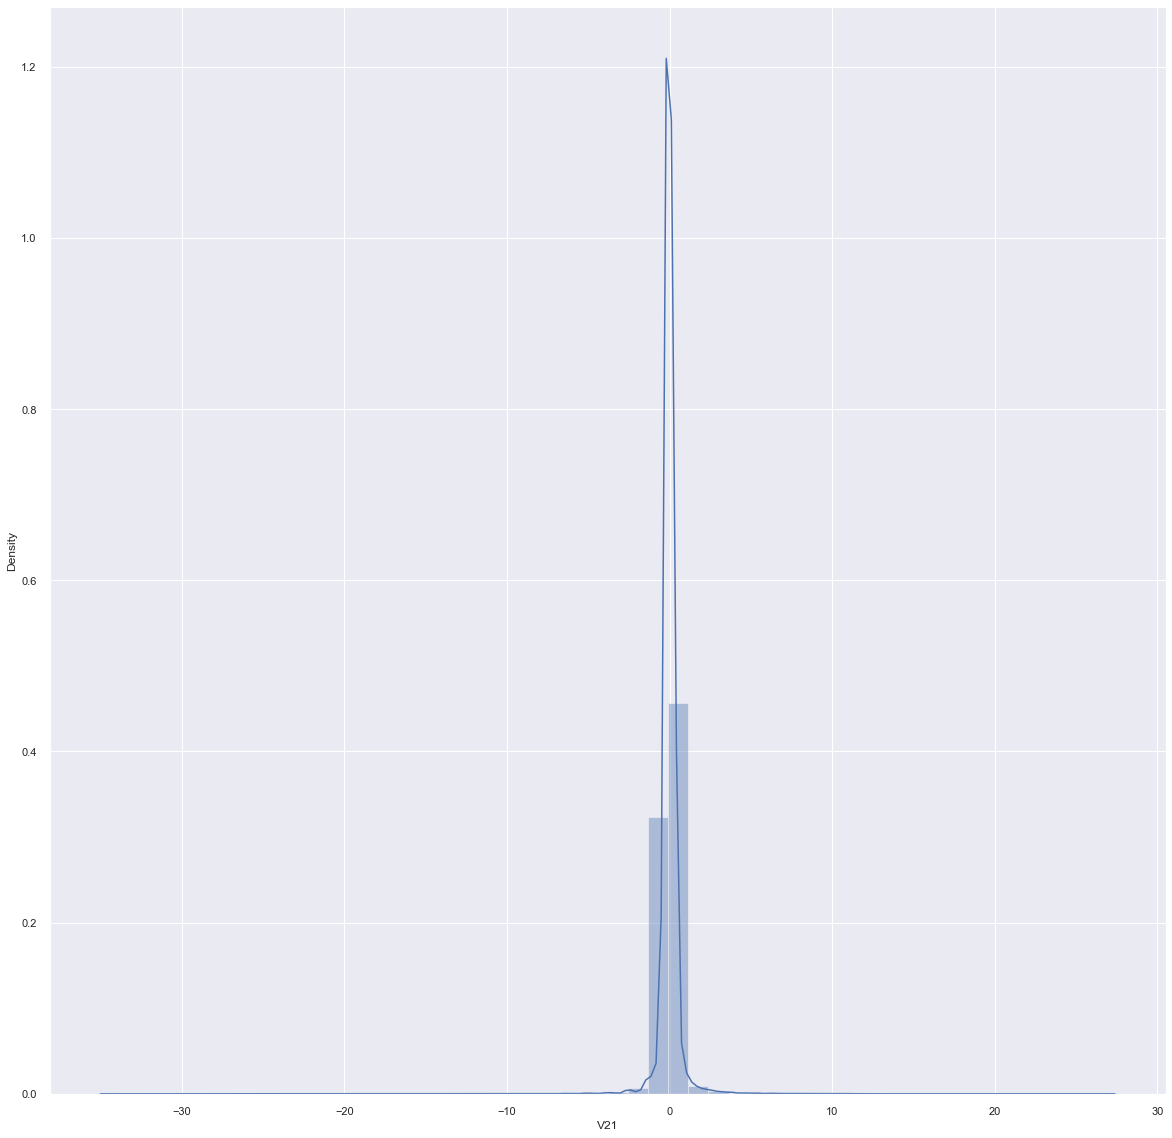

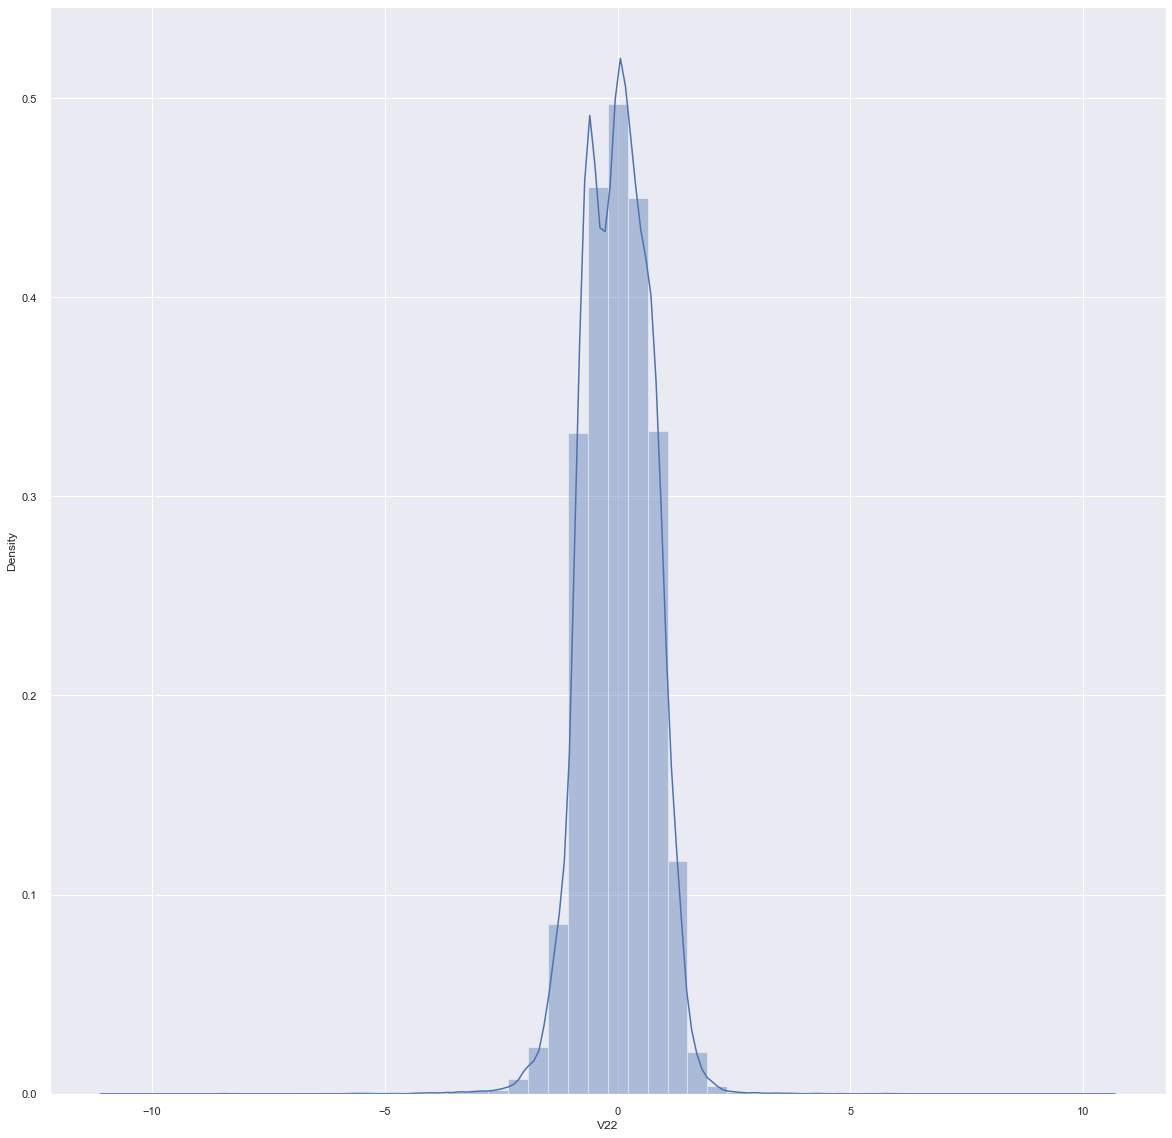

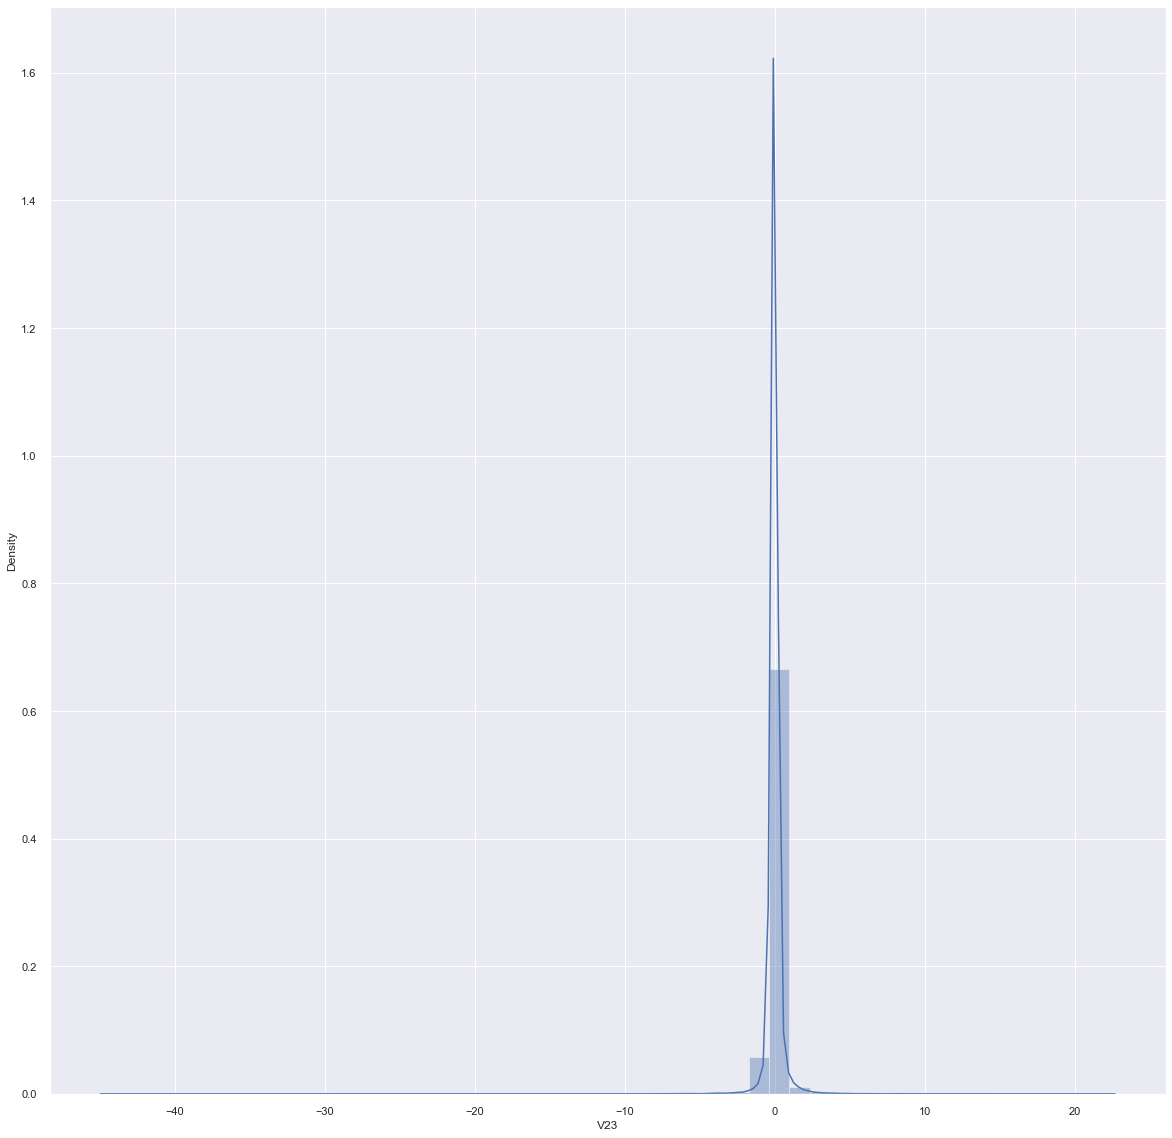

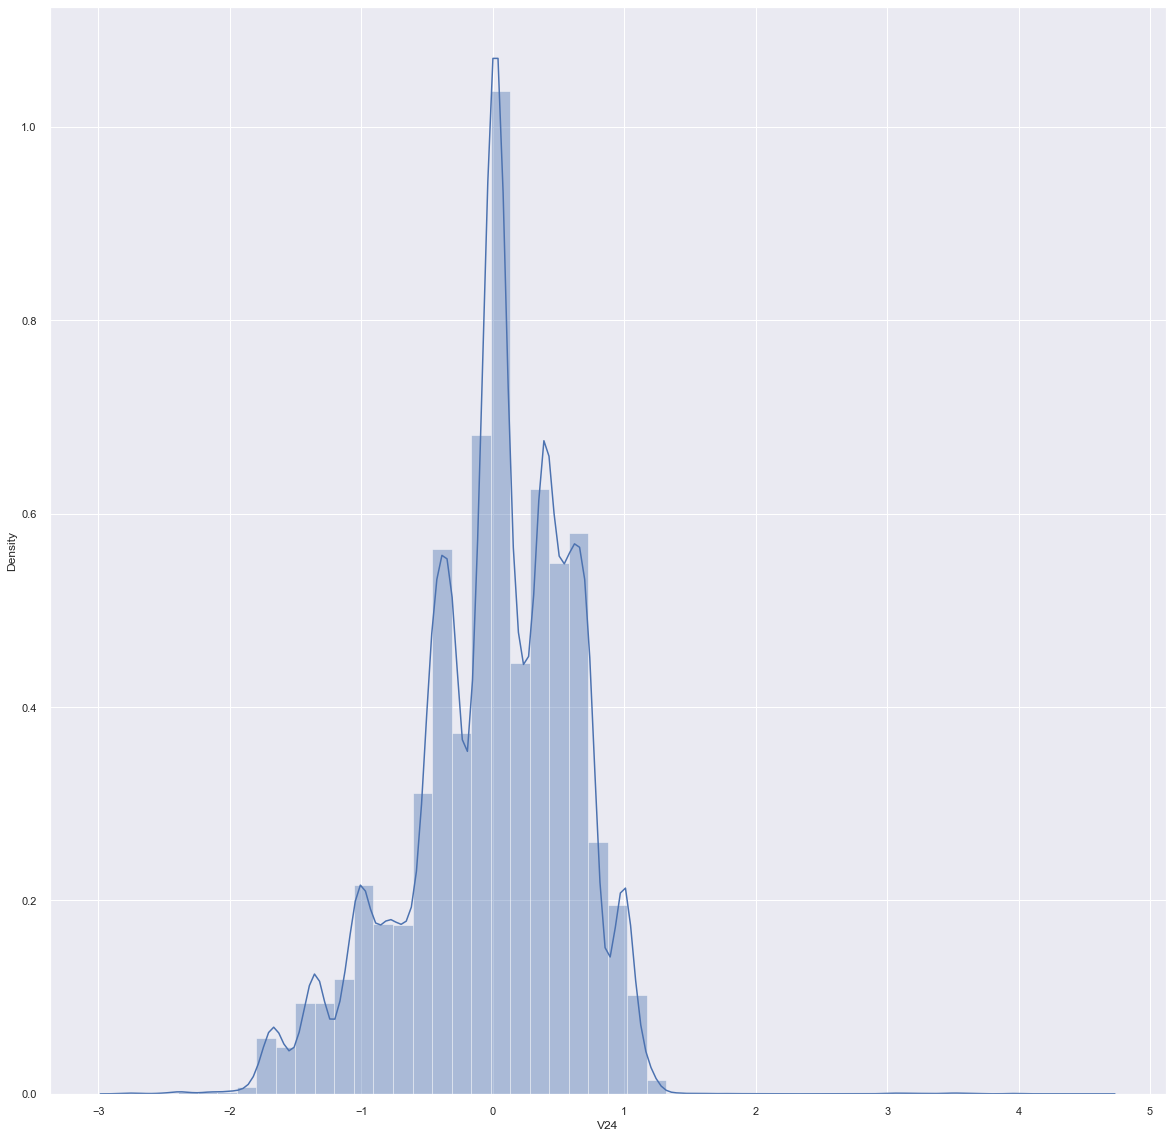

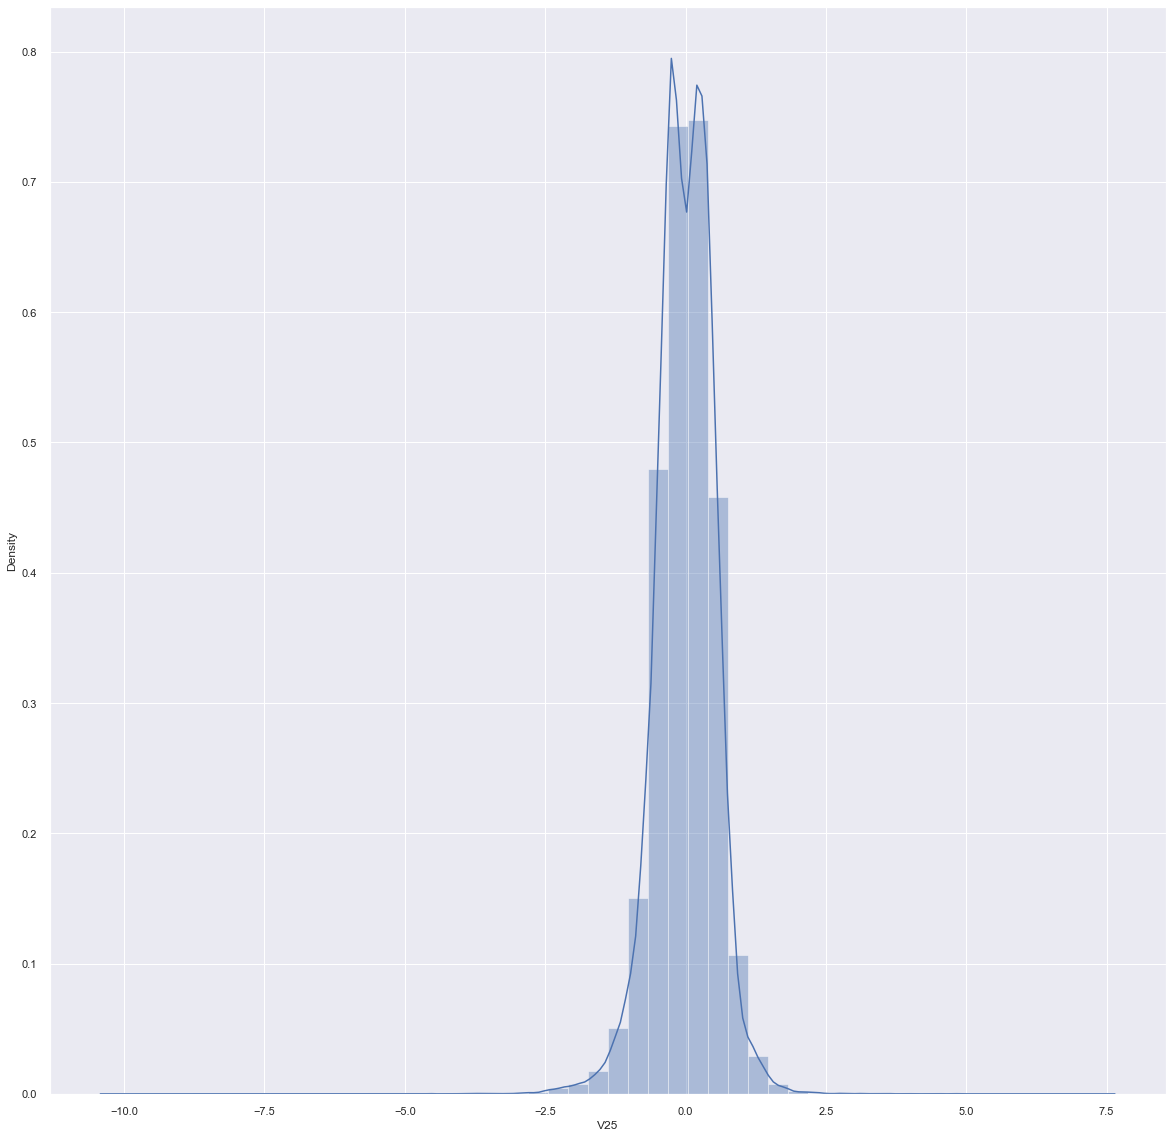

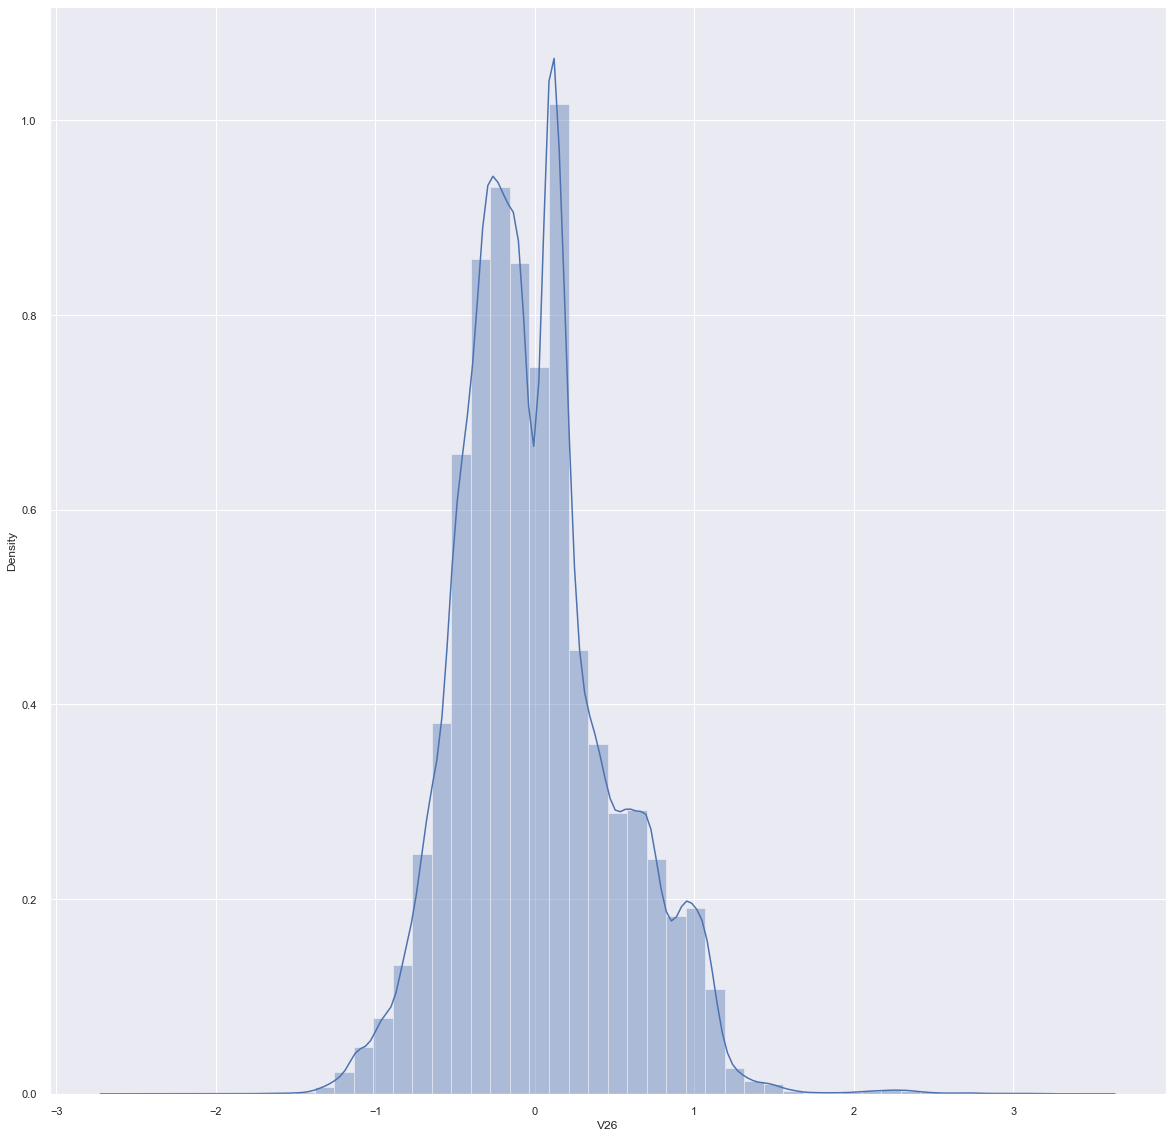

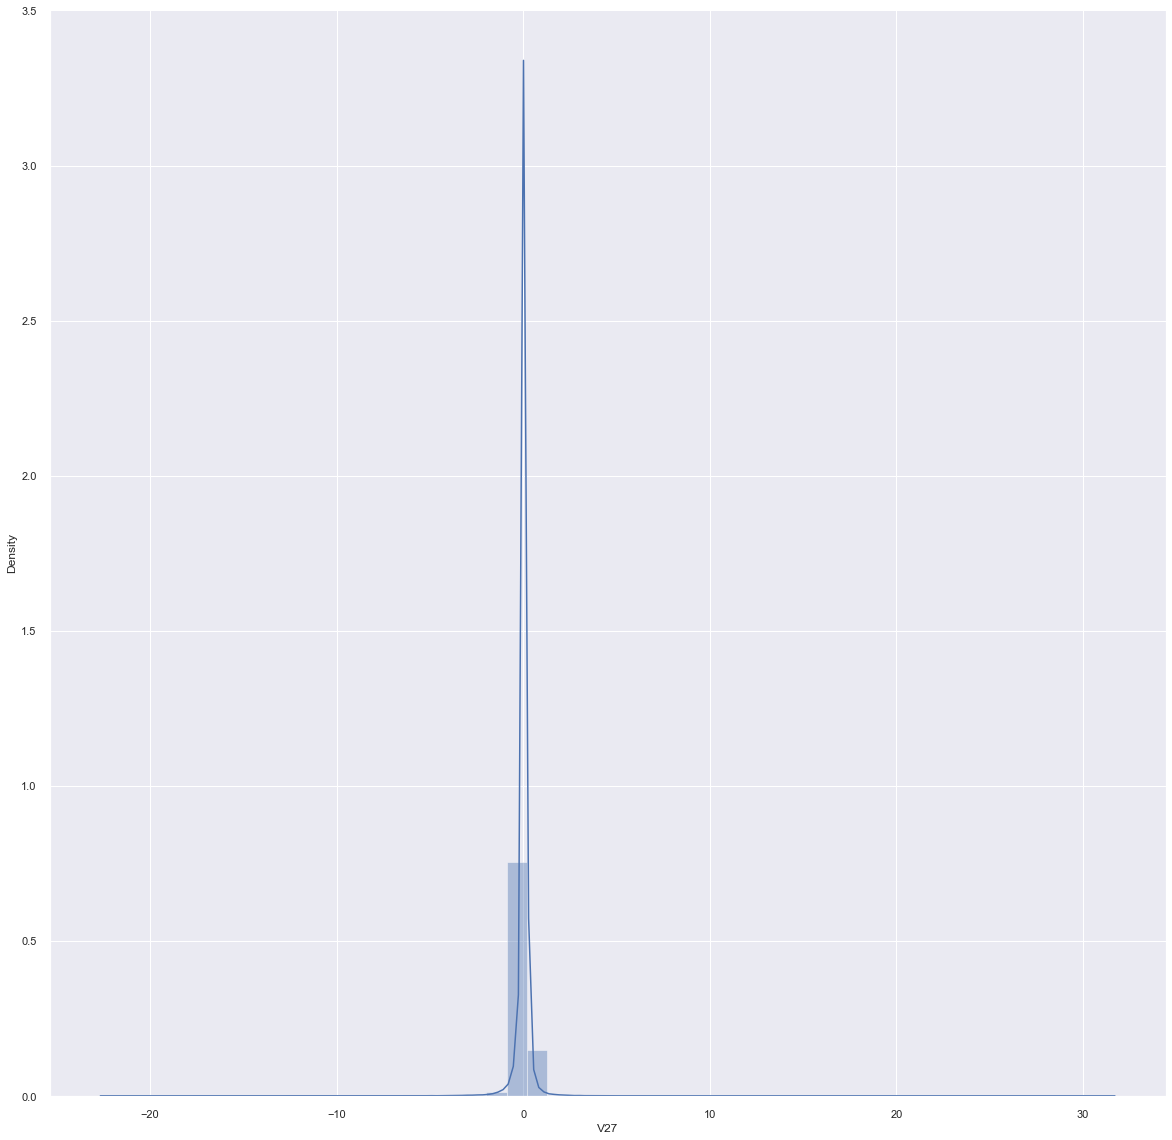

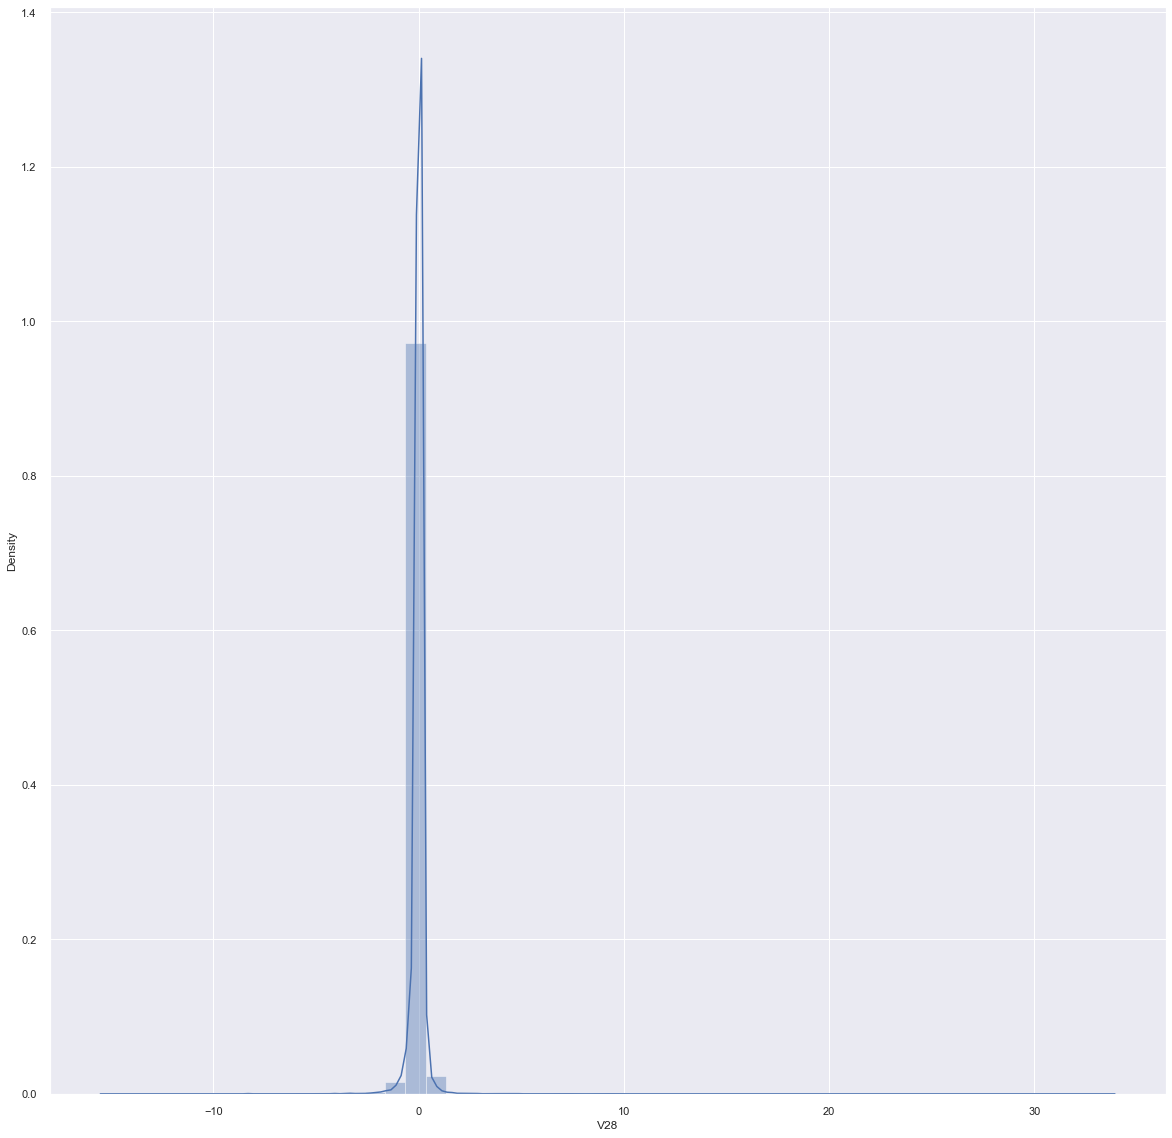

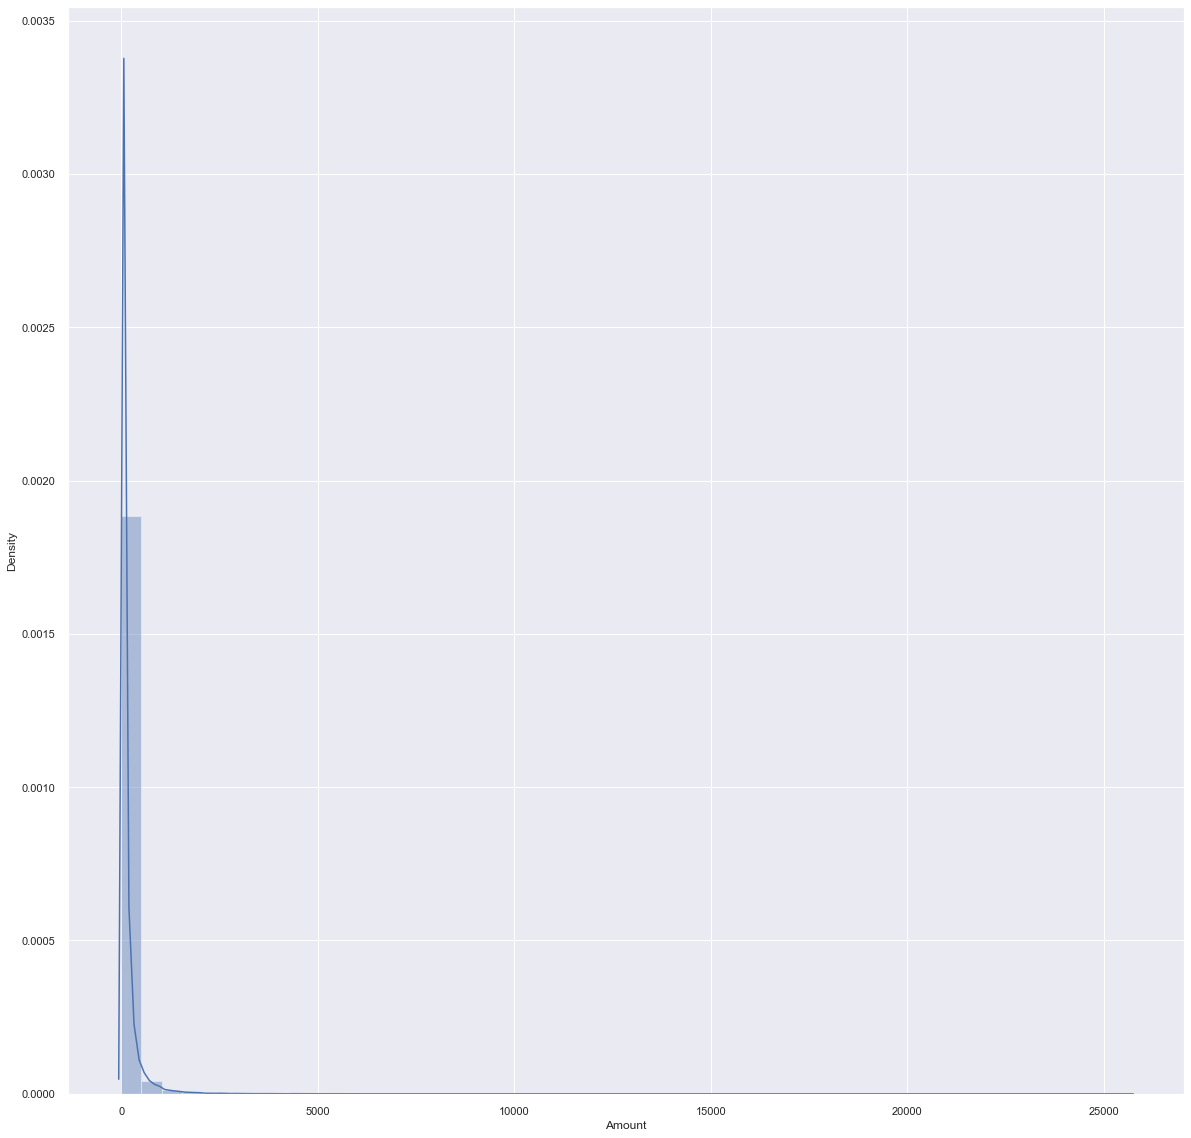

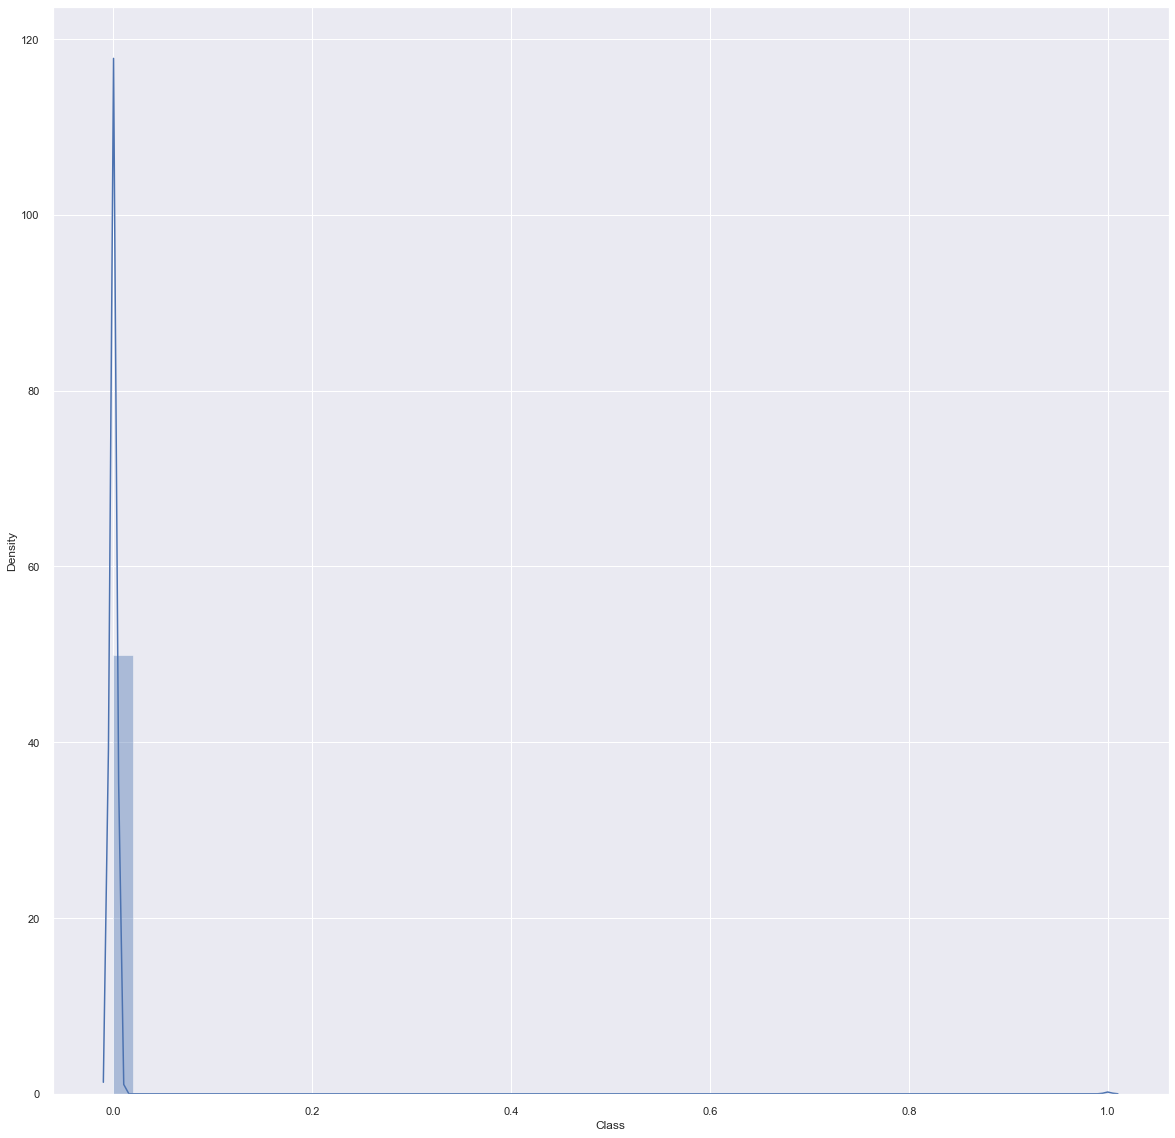

In [233]:
# using for loop to plot histogram all the individual columns
for i, col in enumerate(f.columns):
    plt.figure(i)
    sns.distplot(f[col])
plt.rc('figure', figsize=(6, 3))

In [234]:
f['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

       as we can see the above counts the dataset is very imbalanced
       0 -------> normal transaction
       1 -------> fraudulent transaction

In [235]:
# data separation for analysis
normal = f[f['Class'] == 0]
fraud = f[f['Class'] == 1]

In [236]:
print(normal.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [237]:
# stats of the data
normal.Amount.describe()

count    275190.000000
mean         90.521154
std         253.198478
min           0.000000
25%           6.390000
50%          23.750000
75%          79.900000
max       25691.160000
Name: Amount, dtype: float64

In [238]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [239]:
# now comparing the value of both the transcations
f.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,...,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,90.521154
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


     as the data is very much imbalanced now we will perform undersampling

#### How we gonna do that....?
    we gonna randomly pick the rows from normal transcation equal to the number of fraud transcations/

In [240]:
normal_sample = normal.sample(n = 473)

In [241]:
# now we will concate the two dataframes
nd = pd.concat([normal_sample,fraud], axis = 0)

In [242]:
nd.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183559,-0.526464,-0.420594,-0.509409,-4.194851,2.217129,3.285027,0.077475,0.750125,-2.995738,0.482273,...,-0.292786,-0.778383,-0.205563,0.646611,0.751970,-0.253688,-0.009484,0.033732,51.00,0
254561,2.000919,-0.864041,-1.219512,-0.690400,-0.677732,-0.497430,-0.894206,-0.025355,-0.256205,0.203446,...,0.315196,0.873464,0.002262,-0.477046,-0.155311,-0.089584,0.020594,-0.014459,74.99,0
190774,-2.682184,-1.148645,1.258870,-2.531184,1.228326,1.691466,0.246707,-0.045485,-0.040970,1.026738,...,-0.426963,-0.276193,0.409113,-0.777018,0.354082,-0.553396,-1.074592,0.360989,30.00,0
230082,1.897397,-0.353340,-0.393962,0.243839,-0.315779,0.091623,-0.523169,0.111242,0.843124,-0.050942,...,-0.100789,-0.206774,0.373460,0.688394,-0.431335,-0.678341,0.032129,-0.027848,29.99,0
260996,-0.701991,1.048741,0.271437,0.020680,0.260827,-0.867098,1.014935,-0.380935,0.049834,0.252302,...,-0.146955,-0.283048,-0.030076,0.072328,-0.688048,0.338493,-0.153426,0.299009,37.17,0


In [243]:
nd.tail(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


    as we can see above the data is randomly picked

In [244]:
nd['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

    now we can see above we have the balanced dataset

In [245]:
# now comparing the value of both the transcations
nd.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.210265,-0.127182,-0.023750,0.081442,-0.060015,-0.114376,0.046215,-0.020402,-0.002280,0.072192,...,-0.071991,-0.045725,-0.009196,-0.012881,0.022974,0.031668,0.004447,-0.050478,0.023472,97.841374
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## model building

In [246]:
# splitting the data into features and target
X = nd.drop('Class', axis=1)
y = nd['Class']

In [247]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183559,-0.526464,-0.420594,-0.509409,-4.194851,2.217129,3.285027,0.077475,0.750125,-2.995738,0.482273,...,-0.203299,-0.292786,-0.778383,-0.205563,0.646611,0.751970,-0.253688,-0.009484,0.033732,51.00
254561,2.000919,-0.864041,-1.219512,-0.690400,-0.677732,-0.497430,-0.894206,-0.025355,-0.256205,0.203446,...,0.191989,0.315196,0.873464,0.002262,-0.477046,-0.155311,-0.089584,0.020594,-0.014459,74.99
190774,-2.682184,-1.148645,1.258870,-2.531184,1.228326,1.691466,0.246707,-0.045485,-0.040970,1.026738,...,-0.569102,-0.426963,-0.276193,0.409113,-0.777018,0.354082,-0.553396,-1.074592,0.360989,30.00
230082,1.897397,-0.353340,-0.393962,0.243839,-0.315779,0.091623,-0.523169,0.111242,0.843124,-0.050942,...,-0.079816,-0.100789,-0.206774,0.373460,0.688394,-0.431335,-0.678341,0.032129,-0.027848,29.99
260996,-0.701991,1.048741,0.271437,0.020680,0.260827,-0.867098,1.014935,-0.380935,0.049834,0.252302,...,-0.024424,-0.146955,-0.283048,-0.030076,0.072328,-0.688048,0.338493,-0.153426,0.299009,37.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [248]:
y

183559    0
254561    0
190774    0
230082    0
260996    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

In [249]:
# splitting the dataset in to train and test
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify = y, random_state= 0 )

In [250]:
print(X.shape,X_train.shape,X_test.shape)

(946, 29) (662, 29) (284, 29)


### LOGISTIC REGRESSION MODEL

In [251]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [252]:
# printing the accuracy of the model
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.926056338028169
F1 score of the Logistic Regression model is 0.9219330855018587


### classification_report

In [253]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_yhat))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       142
           1       0.98      0.87      0.92       142

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



### visualizing the classification report by using yellowbrick lib

In [254]:
# Classifier Evaluation Imports
from sklearn.linear_model import LogisticRegression 
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix

In [255]:
# assigning classes
classes = ['0', '1']

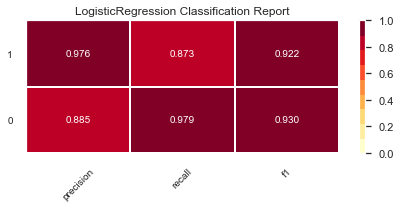

In [256]:
lr= LogisticRegression()
visualizer = ClassificationReport(lr, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

#### getting the confusion matrix

In [257]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, lr_yhat)
print(cf_matrix)

[[139   3]
 [ 18 124]]


### plotting the confusion matrix

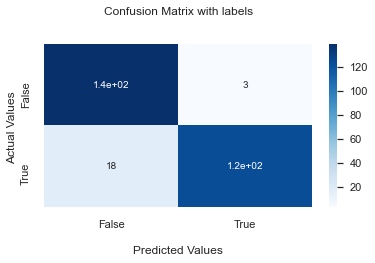

In [258]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.

sns.set(rc = {'figure.figsize':(8,8)}) # chaning the default values of plot size
plt.show()

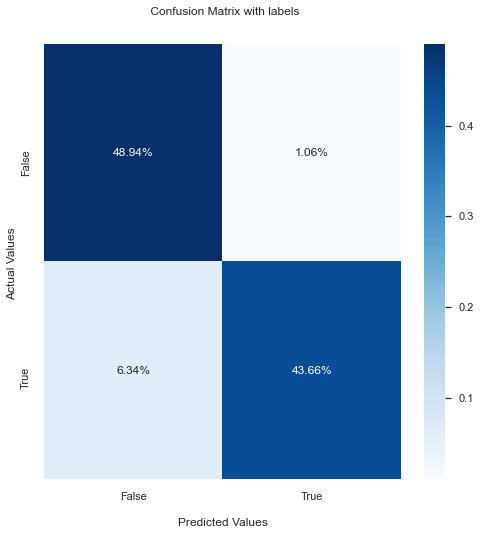

In [259]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

### visualising the  ConfusionMatrix by using yellowbrick lib

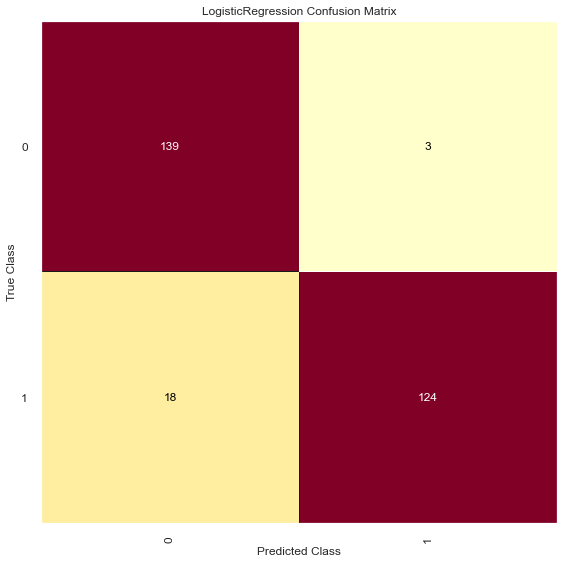

In [260]:
logReg = LogisticRegression()
visualizer = ConfusionMatrix(logReg)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

0.926056338028169

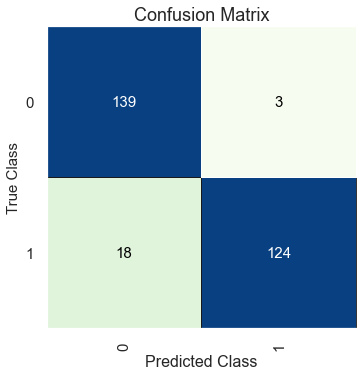

In [261]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure()
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("True Class", fontsize=15)
cm = ConfusionMatrix(lr, classes=[0,1], size=(400,400),
fontsize=15, cmap='GnBu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# some more model visualization using yellowbrick

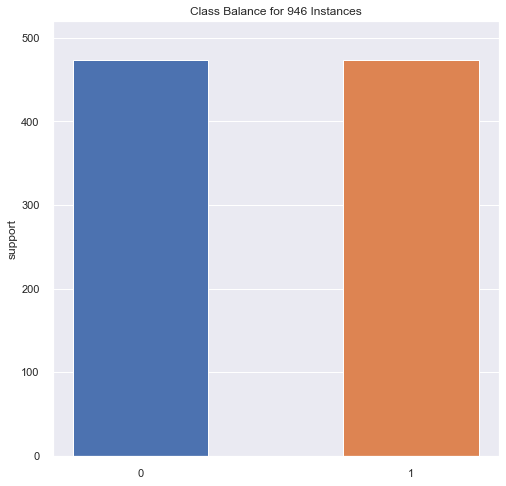

<AxesSubplot:title={'center':'Class Balance for 946 Instances'}, ylabel='support'>

In [262]:
from yellowbrick.target import ClassBalance
import warnings
warnings.filterwarnings('ignore')

visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

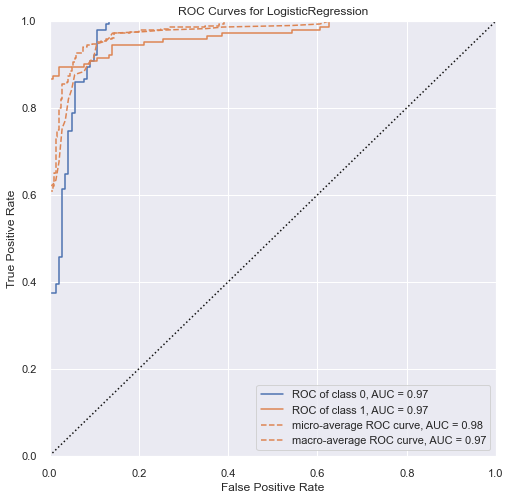

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [263]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(lr, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

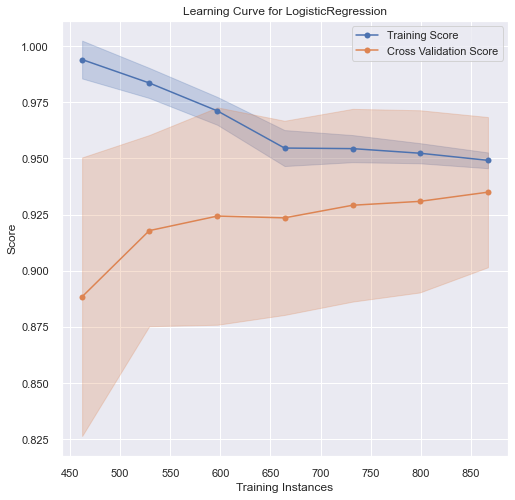

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [264]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

#Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    lr, cv=cv, scoring='f1', train_sizes=sizes, 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()   

<AxesSubplot:title={'center':'Feature Importances of 29 Features using LogisticRegression'}, xlabel='coefficient value'>

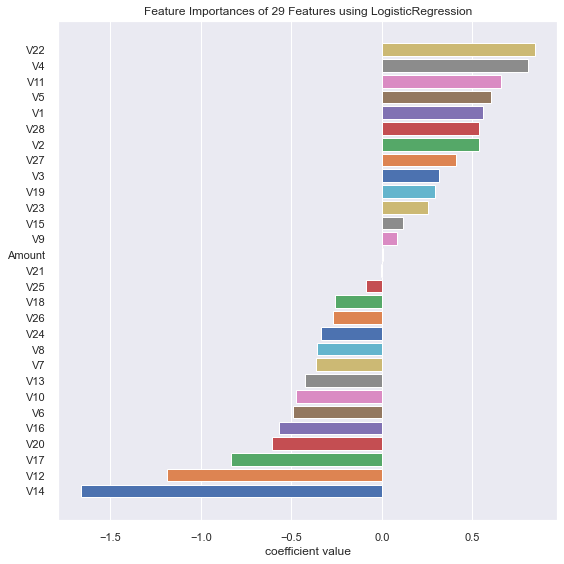

In [265]:
from yellowbrick.model_selection import FeatureImportances
lr_model = LogisticRegression(max_iter=3000)

viz = FeatureImportances(lr_model, relative=False)
viz.fit(X, y)
viz.show(outpath="2.png")